## Análisis de las condiciones de instalación de los sensores

In [49]:
#Importamos unas librerías
from MakeSens import MakeSens
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

### Carga de datos

In [50]:
# Tomamos los datos de la semana
end_date = "2023-08-08 00:00:00"
start_date = "2023-07-25 00:00:00"

In [51]:
#Data muro
data_21 = MakeSens.download_data("E2_00021", start_date, end_date) #Detrás del muro
#Data igual de condiciones
data_22 = MakeSens.download_data("E2_00022", start_date, end_date) 
data_23 = MakeSens.download_data("E2_00023", start_date, end_date)

#Filtramos las columnas que nos interesan
data_21 = data_21[['pm1_1', 'pm1_2','pm10_1', 'pm10_2', 'pm25_1', 'pm25_2']]
data_22 = data_22[['pm1_1', 'pm1_2','pm10_1', 'pm10_2', 'pm25_1', 'pm25_2']]
data_23 = data_23[['pm1_1', 'pm1_2','pm10_1', 'pm10_2', 'pm25_1', 'pm25_2']]

data_21.index = pd.to_datetime(data_21.index)
data_22.index = pd.to_datetime(data_22.index)
data_23.index = pd.to_datetime(data_23.index)

data_21.head()

pm1_1  pm1_2     pm10_1  pm10_2     pm25_1  pm25_2
2023-07-25 00:00:00   12.0    8.4  17.799999    13.0  17.600000    12.4
2023-07-25 00:01:00   13.2    8.6  20.600000    14.8  20.400000    14.4
2023-07-25 00:02:00   11.4    8.2  20.799999    11.4  19.799999    10.4
2023-07-25 00:03:00   13.0   11.2  23.000000    16.6  22.000000    15.6
2023-07-25 00:04:00   11.0   12.0  19.200001    15.8  19.000000    15.6

### Calibración de sensores internos

In [52]:
#Calculamos la diferencia entre cada sensor
names = ['pm1', 'pm10', 'pm25']
for name in names:
    data_21[name+'_diff'] = data_21[name+'_1'] - data_21[name+'_2']
    data_22[name+'_diff'] = data_22[name+'_1'] - data_22[name+'_2']
    data_23[name+'_diff'] = data_23[name+'_1'] - data_23[name+'_2']


Text(0.5, 0.98, 'Comparación de los sensores internos de las estaciones')

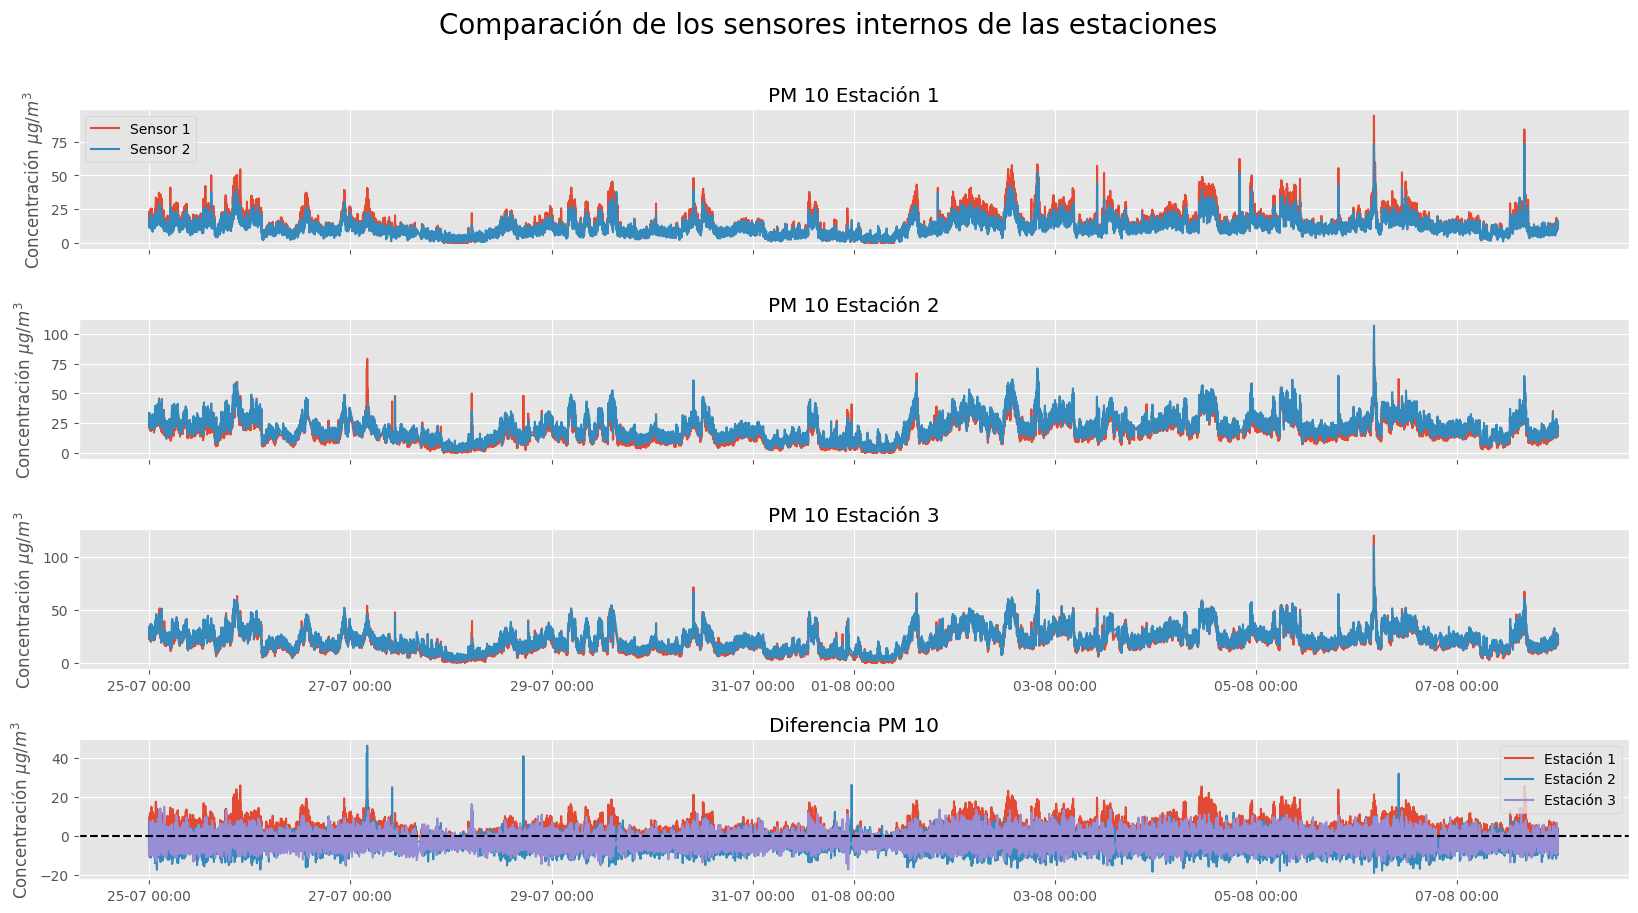

In [53]:
plt.style.use('ggplot')
fig, axs = plt.subplots(4,1,figsize=(20, 10))

axs[0].plot(data_21.index, data_21['pm10_1'], label='Sensor 1')
axs[0].plot(data_21.index, data_21['pm10_2'], label='Sensor 2')
axs[0].set_title('PM 10 Estación 1')
axs[0].set_ylabel('Concentración $ \mu g/m^3$')
axs[0].legend()
axs[0].set_xticklabels([])

axs[1].plot(data_22.index, data_22['pm10_1'], label='Sensor 1')
axs[1].plot(data_22.index, data_22['pm10_2'], label='Sensor 2')
axs[1].set_title('PM 10 Estación 2')
axs[1].set_ylabel('Concentración $ \mu g/m^3$')
# axs[1].legend()
axs[1].set_xticklabels([])

axs[2].plot(data_23.index, data_23['pm10_1'], label='Sensor 1')
axs[2].plot(data_23.index, data_23['pm10_2'], label='Sensor 2')
axs[2].set_title('PM 10 Estación 3')
axs[2].set_ylabel('Concentración $ \mu g/m^3$')
# axs[2].legend()
#Cambiamos el formato de las etiquetas del eje x
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))

#Dejamos un pequeño espacio y añadimos el ultimo gráfico
plt.subplots_adjust(hspace=0.5)
axs[3].plot(data_21.index, data_21['pm10_diff'], label='Estación 1')
axs[3].plot(data_22.index, data_22['pm10_diff'], label='Estación 2')
axs[3].plot(data_23.index, data_23['pm10_diff'], label='Estación 3')
axs[3].set_title('Diferencia PM 10')
axs[3].set_ylabel('Concentración $ \mu g/m^3$')
axs[3].legend()
axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
axs[3].axhline(y=0, color='black', linestyle='--')

fig.suptitle('Comparación de los sensores internos de las estaciones', fontsize=20)

In [54]:
#Hagamos un resample de datos para visualizar mejor

data_21_h = data_21.resample('H').mean().copy().dropna()
data_22_h = data_22.resample('H').mean().copy().dropna()
data_23_h = data_23.resample('H').mean().copy().dropna()

Text(0.5, 0.95, 'Comparación de los sensores internos')

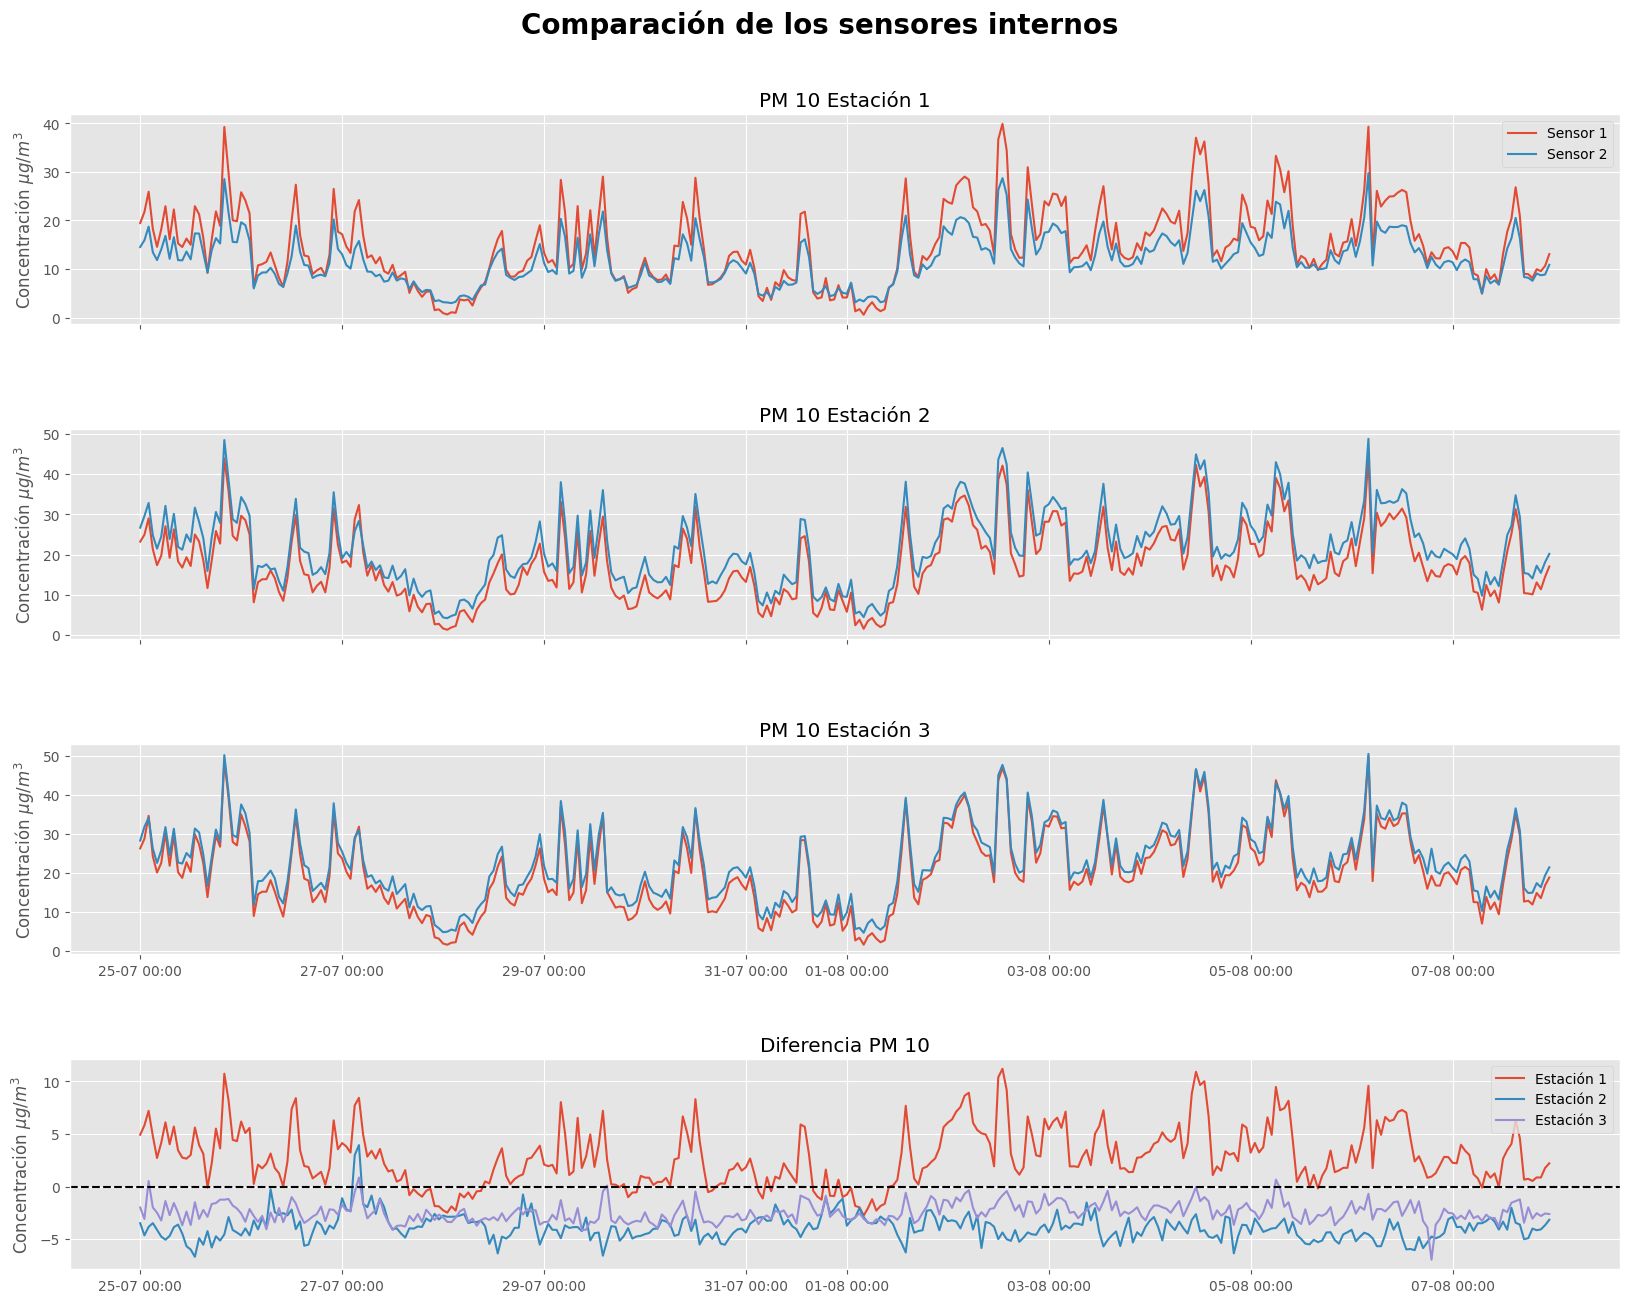

In [55]:
fig, axs = plt.subplots(4, 1, figsize=(20, 15))

axs[0].plot(data_21_h.index, data_21_h["pm10_1"], label= "Sensor 1")
axs[0].plot(data_21_h.index, data_21_h["pm10_2"], label= "Sensor 2")
axs[0].set_title('PM 10 Estación 1')
axs[0].set_ylabel('Concentración $ \mu g/m^3$')
axs[0].legend()
axs[0].set_xticklabels([])

axs[1].plot(data_22_h.index, data_22_h['pm10_1'], label='Sensor 1')
axs[1].plot(data_22_h.index, data_22_h['pm10_2'], label='Sensor 2')
axs[1].set_title('PM 10 Estación 2')
axs[1].set_ylabel('Concentración $ \mu g/m^3$')
# axs[1].legend()
axs[1].set_xticklabels([])

axs[2].plot(data_23_h.index, data_23_h['pm10_1'], label='Sensor 1')
axs[2].plot(data_23_h.index, data_23_h['pm10_2'], label='Sensor 2')
axs[2].set_title('PM 10 Estación 3')
axs[2].set_ylabel('Concentración $ \mu g/m^3$')
# axs[2].legend()
#Cambiamos el formato de las etiquetas del eje x
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))

#Dejamos un pequeño espacio y añadimos el ultimo gráfico
plt.subplots_adjust(hspace=0.5)
axs[3].plot(data_21_h.index, data_21_h['pm10_diff'], label='Estación 1')
axs[3].plot(data_22_h.index, data_22_h['pm10_diff'], label='Estación 2')
axs[3].plot(data_23_h.index, data_23_h['pm10_diff'], label='Estación 3')
axs[3].set_title('Diferencia PM 10')
axs[3].set_ylabel('Concentración $ \mu g/m^3$')
axs[3].legend()
axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
axs[3].axhline(y=0, color='black', linestyle='--')

#Titulo general de la gráfica
fig.suptitle('Comparación de los sensores internos', fontsize=20, fontweight='bold', y=0.95)


In [76]:
#Calculamos la desviación estándar y la diferencia promedio
df_mean = data_21.mean()
df_std_h = data_21_h.std()
df_std = data_21.std()
#Calculamos la media cuadrática para cada columna
df_rmms_h = np.sqrt((data_21_h**2).mean())
df_rmms = np.sqrt((data_21**2).mean())

#Construimos un dataframe con los resultados
sensores_internos = pd.DataFrame({'Diferencia promedio': df_mean, 'Desviación estándar': df_std, 'Desviación estándar (horas)': df_std_h, 'Media cuadrática': df_rmms, 'Media cuadrática (horas)': df_rmms_h}).round(3)
sensores_internos

Diferencia promedio  Desviación estándar  \
pm1_1                    8.765                4.937   
pm1_2                    8.363                3.701   
pm10_1                  14.855                8.894   
pm10_2                  12.026                6.156   
pm25_1                  14.139                8.173   
pm25_2                  11.322                5.674   
pm1_diff                 0.402                2.582   
pm10_diff                2.829                4.093   
pm25_diff                2.817                3.796   

           Desviación estándar (horas)  Media cuadrática  \
pm1_1                            4.475            10.060   
pm1_2                            2.968             9.145   
pm10_1                           7.884            17.313   
pm10_2                           5.187            13.510   
pm25_1                           7.348            16.331   
pm25_2                           4.799            12.664   
pm1_diff                         1.588             2.613   
pm10_diff                        2.800             4.976   
pm25_diff                        2.662             4.727   

           Media cuadrática (horas)  
pm1_1                         9.826  
pm1_2                         8.863  
pm10_1                       16.790  
pm10_2                       13.079  
pm25_1                       15.908  
pm25_2                       12.280  
pm1_diff                      1.634  
pm10_diff                     3.972  
pm25_diff                     3.867

In [78]:
#Calculamos una diferencia promedio 
prom = {}
std = {}
std_h = {}
media_cuadratica = {}
media_cuadratica_h = {}

for name in names:
    prom[name + "_21"] = round(np.mean(data_21[name+"_diff"]),3)
    prom[name + "_22"] = round(np.mean(data_22[name+"_diff"]),3)
    prom[name + "_23"] = round(np.mean(data_23[name+"_diff"]),3)
    
    std[name + "_21"] = round(np.std(data_21[name+"_diff"]),3)
    std[name + "_22"] = round(np.std(data_22[name+"_diff"]),3)
    std[name + "_23"] = round(np.std(data_23[name+"_diff"]),3)
    std_h[name + "_21"] = round(np.std(data_21[name+"_diff"]),3)
    std_h[name + "_22"] = round(np.std(data_22[name+"_diff"]),3)
    std_h[name + "_23"] = round(np.std(data_23[name+"_diff"]),3)

    media_cuadratica[name + "_21"] = round(np.sqrt(np.mean(data_21[name+"_diff"]**2)),3)
    media_cuadratica[name + "_22"] = round(np.sqrt(np.mean(data_22[name+"_diff"]**2)),3)
    media_cuadratica[name + "_23"] = round(np.sqrt(np.mean(data_23[name+"_diff"]**2)),3)
    media_cuadratica_h[name + "_21"] = round(np.sqrt(np.mean(data_21[name+"_diff"]**2)),3)
    media_cuadratica_h[name + "_22"] = round(np.sqrt(np.mean(data_22[name+"_diff"]**2)),3)
    media_cuadratica_h[name + "_23"] = round(np.sqrt(np.mean(data_23[name+"_diff"]**2)),3)




#Creamos un df que resuma los resultados
sensores_internos = pd.DataFrame(
    [prom,std,std_h,media_cuadratica, media_cuadratica_h], 
    index = ["Promedio", "Desviación estándar", "Desviación estándar (h)", "Media cuadrática", "Media cuadrática (h)"]).T.round(3)
sensores_internos 


Promedio  Desviación estándar  Desviación estándar (h)  \
pm1_21      0.402                2.582                    2.582   
pm1_22     -4.907                2.323                    2.323   
pm1_23     -2.766                2.348                    2.348   
pm10_21     2.829                4.093                    4.093   
pm10_22    -3.904                3.760                    3.760   
pm10_23    -2.438                3.694                    3.694   
pm25_21     2.817                3.796                    3.796   
pm25_22    -3.658                3.072                    3.072   
pm25_23    -2.434                3.100                    3.100   

         Media cuadrática  Media cuadrática (h)  
pm1_21              2.613                 2.613  
pm1_22              5.429                 5.429  
pm1_23              3.629                 3.629  
pm10_21             4.976                 4.976  
pm10_22             5.421                 5.421  
pm10_23             4.426                 4.426  
pm25_21             4.727                 4.727  
pm25_22             4.777                 4.777  
pm25_23             3.941                 3.941

Los sensores son diferentes, por ende, trabajaremos con ellos por separado.

### Calibración de estaciones

In [58]:
#Trabajaremos con las estaciones 2 y 3, que están a la misma altura

#Data diff entre las estaciones
df_diff_estaciones = pd.DataFrame()
for column in data_22.columns:
    df_diff_estaciones[column] = data_23[column] - data_22[column]

df_diff_estaciones.head()

pm1_1     pm1_2    pm10_1    pm10_2    pm25_1  \
2023-07-25 00:00:00  7.400001  1.600000  3.000000  3.400002  7.400002   
2023-07-25 00:01:00  2.799999  0.400000 -0.600001 -0.799999  0.399999   
2023-07-25 00:02:00  6.000001 -1.600001  5.600000 -0.600000  5.600000   
2023-07-25 00:03:00  2.600000  2.000000  4.000000  3.200001  3.399999   
2023-07-25 00:04:00  3.600000  1.000000 -5.000000  3.800001 -4.000000   

                       pm25_2  pm1_diff  pm10_diff  pm25_diff  
2023-07-25 00:00:00  3.600001  5.800001  -0.400002   3.800001  
2023-07-25 00:01:00  0.399999  2.399999   0.199998   0.000000  
2023-07-25 00:02:00  0.800000  7.600002   6.200000   4.800000  
2023-07-25 00:03:00  3.199999  0.600000   0.799999   0.200000  
2023-07-25 00:04:00  2.400000  2.600000  -8.800001  -6.400000

In [60]:
#Ahora calculemos la diferencia por hora

df_diff_estaciones_h = pd.DataFrame()
for column in data_22_h.columns:
    df_diff_estaciones_h[column] = data_23_h[column] - data_22_h[column]

df_diff_estaciones_h.head()

pm1_1     pm1_2    pm10_1    pm10_2    pm25_1  \
2023-07-25 00:00:00  3.930702  1.499649  3.020877  1.533685  3.210702   
2023-07-25 01:00:00  4.696667  1.566667  3.743333  2.183333  3.756667   
2023-07-25 02:00:00  4.984863  1.026768  5.569491  1.213092  4.494857   
2023-07-25 03:00:00  4.233898  0.830509  2.834633  1.350169  3.023164   
2023-07-25 04:00:00  3.869209  1.291412  2.674181  1.042373  2.815141   

                       pm25_2  pm1_diff  pm10_diff  pm25_diff  
2023-07-25 00:00:00  2.087193  2.431053   1.487193   1.123509  
2023-07-25 01:00:00  2.230000  3.130000   1.560000   1.526667  
2023-07-25 02:00:00  1.340269  3.958095   4.356400   3.154588  
2023-07-25 03:00:00  1.238644  3.403390   1.484463   1.784520  
2023-07-25 04:00:00  1.313107  2.577797   1.631808   1.502034

In [61]:
#Calculamos la desviación estándar y la diferencia promedio
diff_mean = df_diff_estaciones_h.mean()
diff_std_h = df_diff_estaciones_h.std()
diff_std = df_diff_estaciones.std()
#Calculamos la media cuadrática para cada columna
diff_rmms_h = np.sqrt((df_diff_estaciones_h**2).mean())
diff_rmms = np.sqrt((df_diff_estaciones**2).mean())

#Construimos un dataframe con los resultados
estaciones = pd.DataFrame({'Diferencia promedio': diff_mean, 'Desviación estándar': diff_std, 'Desviación estándar (horas)': diff_std_h, 'Media cuadrática': diff_rmms, 'Media cuadrática (horas)': diff_rmms_h})
estaciones = estaciones.round(3)
estaciones

Diferencia promedio  Desviación estándar  \
pm1_1                    3.182                1.705   
pm1_2                    1.061                2.902   
pm10_1                   2.495                3.583   
pm10_2                   1.064                4.119   
pm25_1                   2.430                2.776   
pm25_2                   1.246                3.453   
pm1_diff                 2.120                3.223   
pm10_diff                1.430                5.184   
pm25_diff                1.184                4.244   

           Desviación estándar (horas)  Media cuadrática  \
pm1_1                            1.179             3.606   
pm1_2                            0.686             3.081   
pm10_1                           1.492             4.371   
pm10_2                           1.015             4.246   
pm25_1                           1.214             3.693   
pm25_2                           0.905             3.661   
pm1_diff                         1.067             3.869   
pm10_diff                        1.379             5.388   
pm25_diff                        1.136             4.415   

           Media cuadrática (horas)  
pm1_1                         3.392  
pm1_2                         1.263  
pm10_1                        2.905  
pm10_2                        1.470  
pm25_1                        2.716  
pm25_2                        1.539  
pm1_diff                      2.373  
pm10_diff                     1.985  
pm25_diff                     1.639

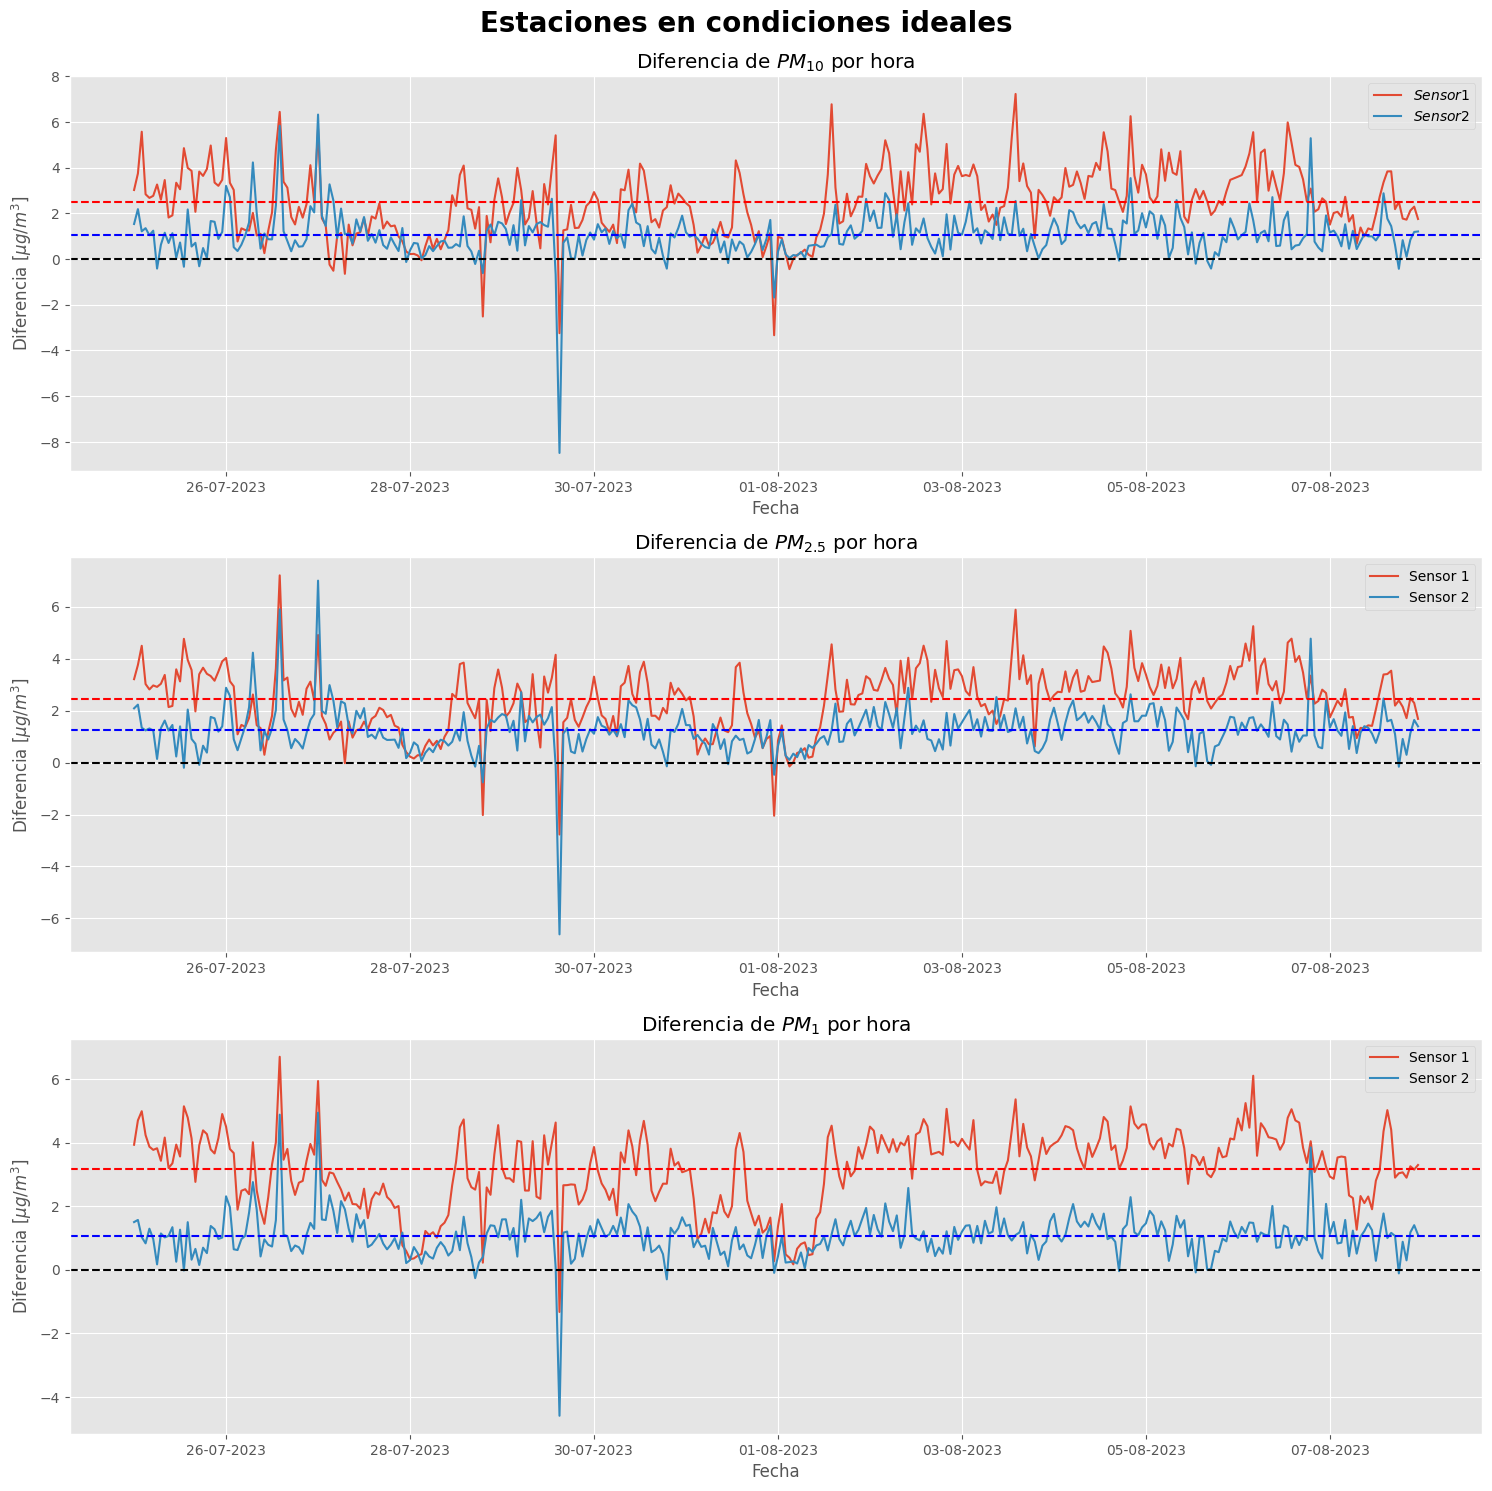

In [150]:
#Graficamos la diferencia por hora
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

ax[0].plot(df_diff_estaciones_h.index, df_diff_estaciones_h['pm10_1'], label='$Sensor 1$')
ax[0].plot(df_diff_estaciones_h.index, df_diff_estaciones_h['pm10_2'], label='$Sensor 2$')
#Línea de cero y línea del promedio
ax[0].axhline(y=0, color='black', linestyle='--')
ax[0].axhline(y=df_diff_estaciones_h['pm10_1'].mean(), color='red', linestyle='--')
ax[0].axhline(y=df_diff_estaciones_h['pm10_2'].mean(), color='blue', linestyle='--')
ax[0].set_title('Diferencia de $PM_{10}$ por hora')
ax[0].set_ylabel('Diferencia [$\mu g/m^3$]')
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax[0].legend()
ax[0].set_xlabel('Fecha')

ax[1].plot(df_diff_estaciones_h.index, df_diff_estaciones_h['pm25_1'], label= "Sensor 1")
ax[1].plot(df_diff_estaciones_h.index, df_diff_estaciones_h['pm25_2'], label='Sensor 2')
ax[1].axhline(y=0, color='black', linestyle='--')
ax[1].axhline(y=df_diff_estaciones_h['pm25_1'].mean(), color='red', linestyle='--')
ax[1].axhline(y=df_diff_estaciones_h['pm25_2'].mean(), color='blue', linestyle='--')
ax[1].set_title('Diferencia de $PM_{2.5}$ por hora')
ax[1].set_ylabel('Diferencia [$\mu g/m^3$]')
ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax[1].legend()
ax[1].set_xlabel('Fecha')

ax[2].plot(df_diff_estaciones_h.index, df_diff_estaciones_h['pm1_1'], label='Sensor 1')
ax[2].plot(df_diff_estaciones_h.index, df_diff_estaciones_h['pm1_2'], label='Sensor 2')
ax[2].axhline(y=0, color='black', linestyle='--')
ax[2].axhline(y=df_diff_estaciones_h['pm1_1'].mean(), color='red', linestyle='--')
ax[2].axhline(y=df_diff_estaciones_h['pm1_2'].mean(), color='blue', linestyle='--')
ax[2].set_title('Diferencia de $PM_{1}$ por hora')
ax[2].set_ylabel('Diferencia [$\mu g/m^3$]')
ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax[2].legend()
ax[2].set_xlabel('Fecha')

fig.suptitle('Estaciones en condiciones ideales', fontsize=20, fontweight='bold', y=0.99)
# fig.supylabel('Diferencia [$\mu g/m^3$]', fontsize=15, fontweight='bold', x=0.08)
fig.tight_layout(pad=1.0)
# 

### Análisis cerca a un muro

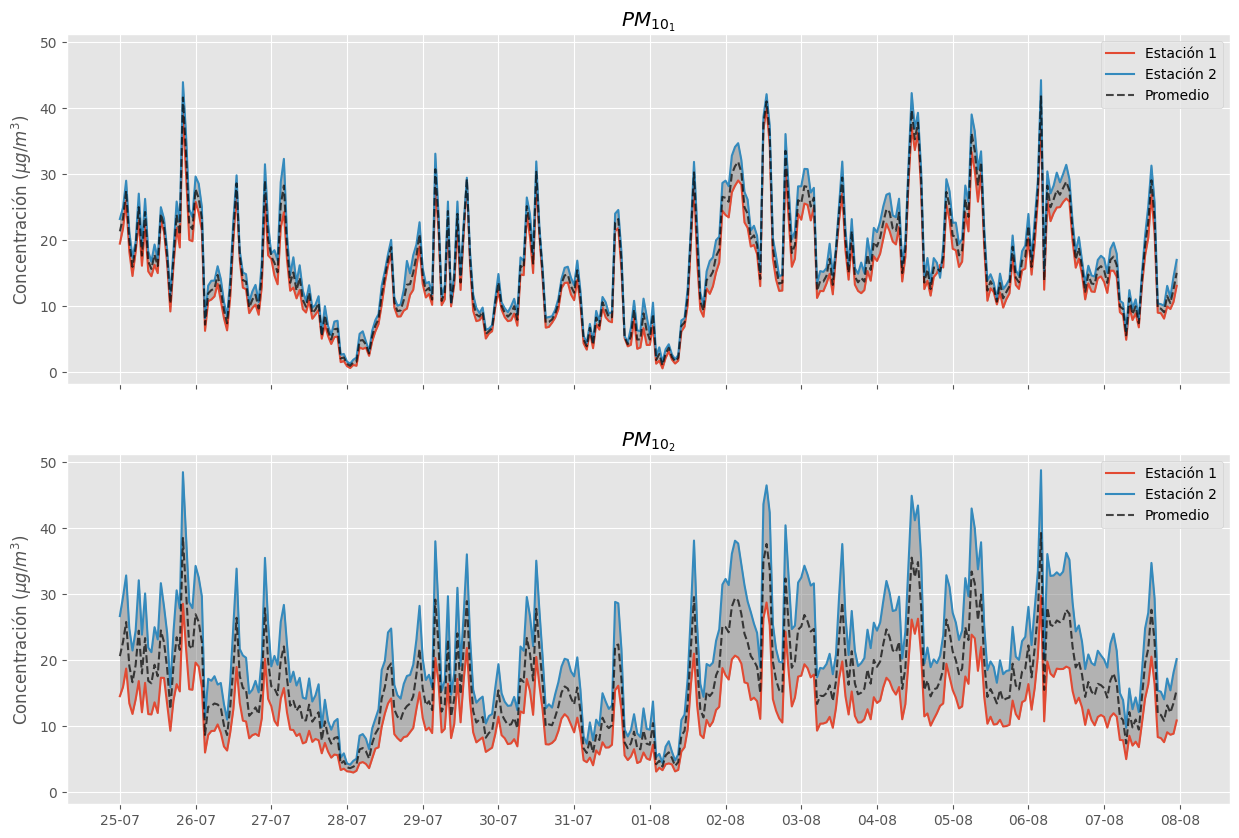

In [83]:
# Graficamos los datos

fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True, sharey=True)

axs[0].plot(data_21_h.index, data_21_h['pm10_1'], label='Estación 1')
axs[0].plot(data_22_h.index, data_22_h['pm10_1'], label='Estación 2')
axs[0].fill_between(data_21_h.index, data_21_h['pm10_1'], data_22_h['pm10_1'], alpha=0.5, color = 'grey')
promedio = (data_21_h['pm10_1'] + data_22_h['pm10_1'])/2
axs[0].plot(data_21_h.index, promedio, "--", label='Promedio', alpha=0.7, color='black')
axs[0].set_title('$PM_{10_1}$')
axs[0].set_ylabel('Concentración ($\mu g/m^3$)')
axs[0].legend()
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

axs[1].plot(data_21_h.index, data_21_h['pm10_2'], label='Estación 1')
axs[1].plot(data_22_h.index, data_22_h['pm10_2'], label='Estación 2')
axs[1].fill_between(data_21_h.index, data_21_h['pm10_2'], data_22_h['pm10_2'], alpha=0.5, color = 'grey')
promedio = (data_21_h['pm10_2'] + data_22_h['pm10_2'])/2
axs[1].plot(data_21_h.index, promedio, "--", label='Promedio', alpha=0.7, color='black')
axs[1].set_title('$PM_{10_2}$')
axs[1].set_ylabel('Concentración ($\mu g/m^3$)')
axs[1].legend()
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=1))


Text(0.1, 0.5, 'Concentración ($\\mu g/m^3$)')

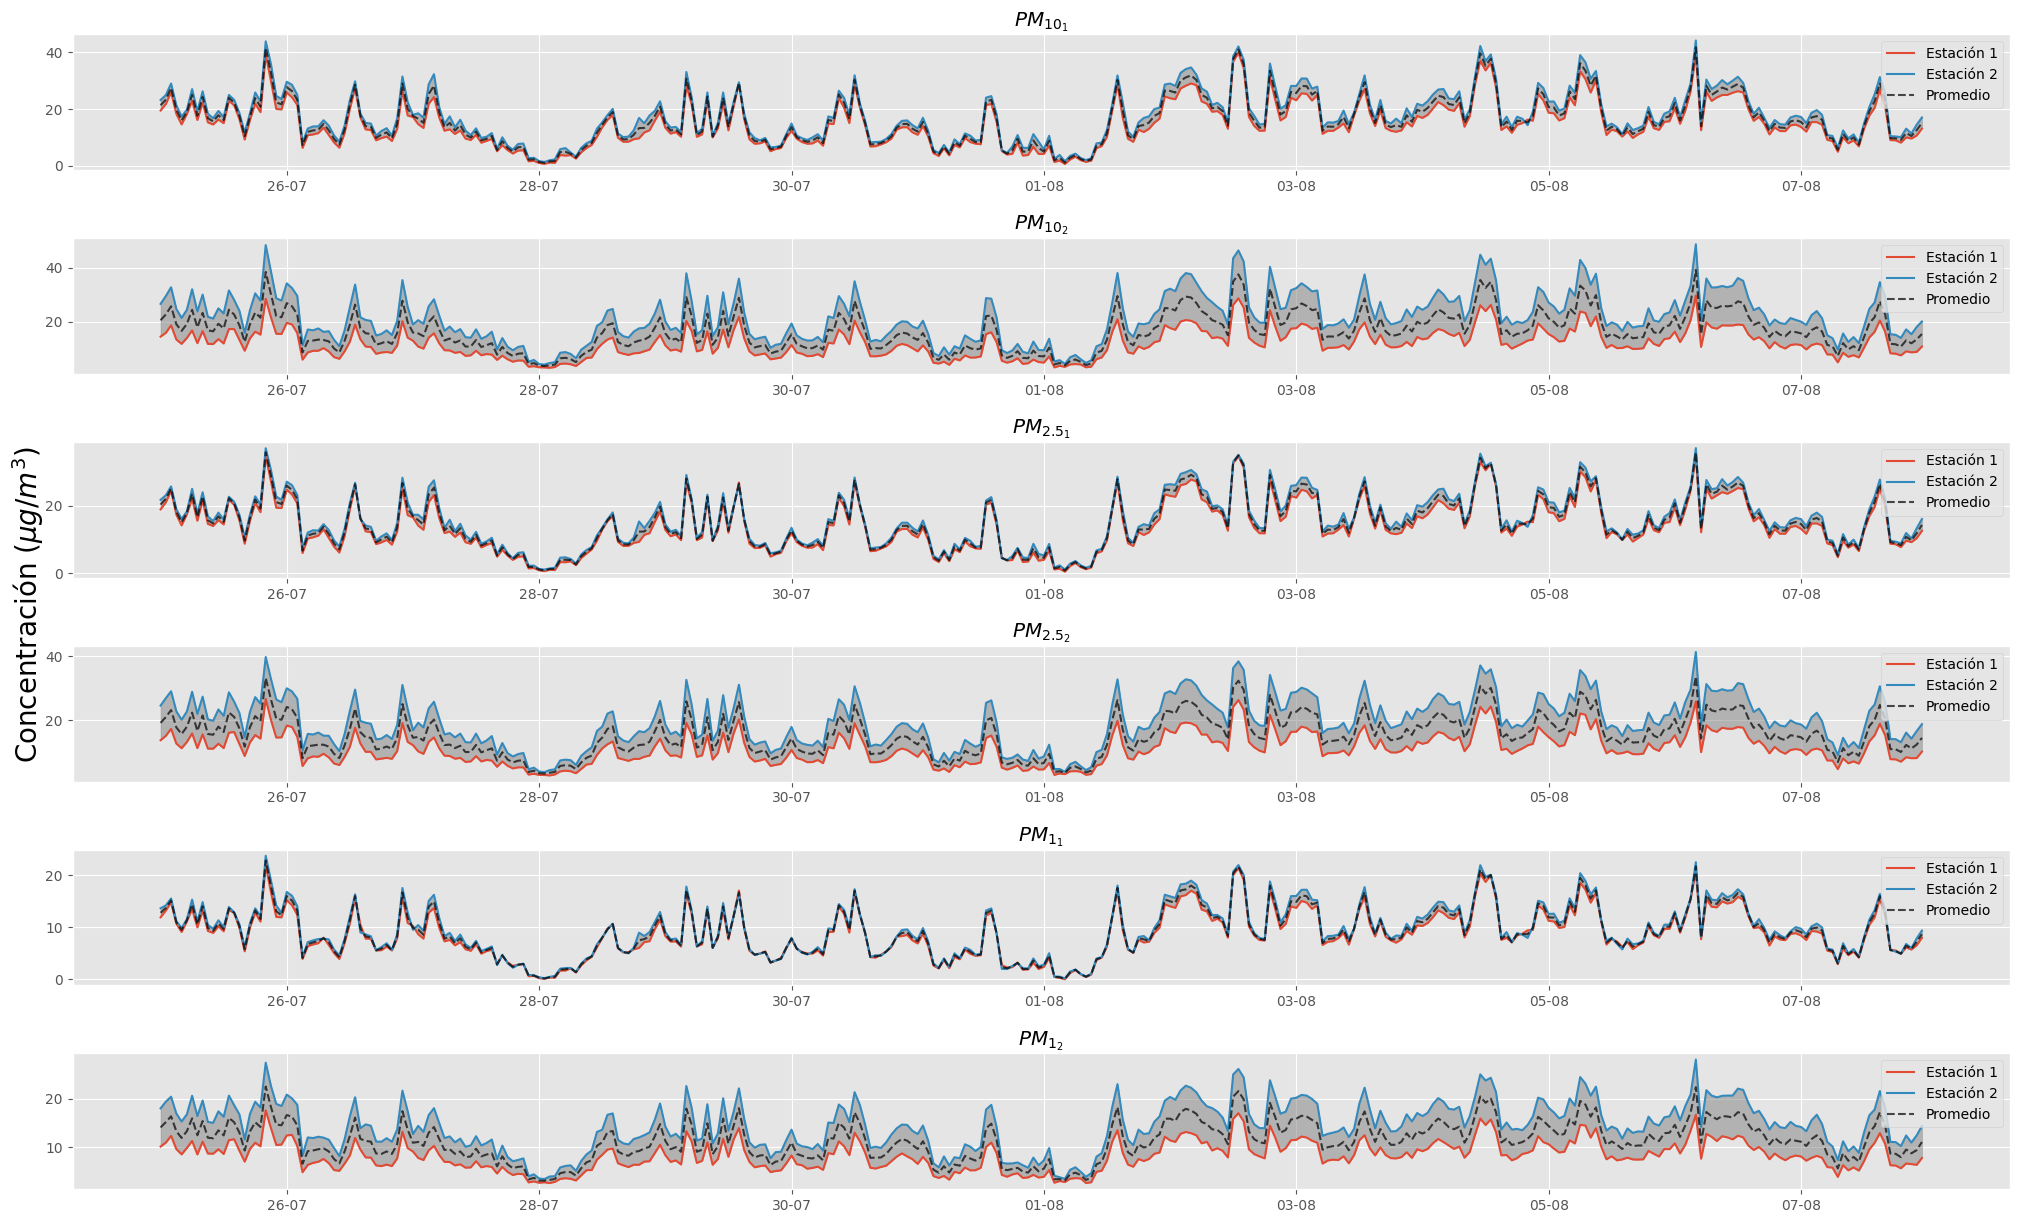

In [96]:
#Gráfica 
fig, axs = plt.subplots(6,1, figsize=(25,15))

axs[0].plot(data_21_h.index, data_21_h['pm10_1'], label='Estación 1')
axs[0].plot(data_22_h.index, data_22_h['pm10_1'], label='Estación 2')
axs[0].fill_between(data_21_h.index, data_21_h['pm10_1'], data_22_h['pm10_1'], alpha=0.5, color = 'grey')
promedio = (data_21_h['pm10_1'] + data_22_h['pm10_1'])/2
axs[0].plot(data_21_h.index, promedio, "--", label='Promedio', alpha=0.7, color='black')
axs[0].set_title('$PM_{10_1}$')
# axs[1].set_ylabel('Concentración ($\mu g/m^3$)')
axs[0].legend()
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=2))
#Espacio entre gráficas
fig.subplots_adjust(hspace=0.5)

axs[1].plot(data_21_h.index, data_21_h['pm10_2'], label='Estación 1')
axs[1].plot(data_22_h.index, data_22_h['pm10_2'], label='Estación 2')
axs[1].fill_between(data_21_h.index, data_21_h['pm10_2'], data_22_h['pm10_2'], alpha=0.5, color = 'grey')
promedio = (data_21_h['pm10_2'] + data_22_h['pm10_2'])/2
axs[1].plot(data_21_h.index, promedio, "--", label='Promedio', alpha=0.7, color='black')
axs[1].set_title('$PM_{10_2}$')
# axs[2].set_ylabel('Concentración ($\mu g/m^3$)')
axs[1].legend()
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=2))

axs[2].plot(data_21_h.index, data_21_h['pm25_1'], label='Estación 1')
axs[2].plot(data_22_h.index, data_22_h['pm25_1'], label='Estación 2')
axs[2].fill_between(data_21_h.index, data_21_h['pm25_1'], data_22_h['pm25_1'], alpha=0.5, color = 'grey')
promedio = (data_21_h['pm25_1'] + data_22_h['pm25_1'])/2
axs[2].plot(data_21_h.index, promedio, "--", label='Promedio', alpha=0.7, color='black')
axs[2].set_title('$PM_{2.5_1}$')
# ax[3].set_ylabel('Concentración ($\mu g/m^3$)')
axs[2].legend()
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
axs[2].xaxis.set_major_locator(mdates.DayLocator(interval=2))

axs[3].plot(data_21_h.index, data_21_h['pm25_2'], label='Estación 1')
axs[3].plot(data_22_h.index, data_22_h['pm25_2'], label='Estación 2')
axs[3].fill_between(data_21_h.index, data_21_h['pm25_2'], data_22_h['pm25_2'], alpha=0.5, color = 'grey')
promedio = (data_21_h['pm25_2'] + data_22_h['pm25_2'])/2
axs[3].plot(data_21_h.index, promedio, "--", label='Promedio', alpha=0.7, color='black')
axs[3].set_title('$PM_{2.5_2}$')
# axs[4].set_ylabel('Concentración ($\mu g/m^3$)')
axs[3].legend()
axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
axs[3].xaxis.set_major_locator(mdates.DayLocator(interval=2))

axs[4].plot(data_21_h.index, data_21_h['pm1_1'], label='Estación 1')
axs[4].plot(data_22_h.index, data_22_h['pm1_1'], label='Estación 2')
axs[4].fill_between(data_21_h.index, data_21_h['pm1_1'], data_22_h['pm1_1'], alpha=0.5, color = 'grey')
promedio = (data_21_h['pm1_1'] + data_22_h['pm1_1'])/2
axs[4].plot(data_21_h.index, promedio, "--", label='Promedio', alpha=0.7, color='black')
axs[4].set_title('$PM_{1_1}$')
# axs[5].set_ylabel('Concentración ($\mu g/m^3$)')
axs[4].legend()
axs[4].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
axs[4].xaxis.set_major_locator(mdates.DayLocator(interval=2))

axs[5].plot(data_21_h.index, data_21_h['pm1_2'], label='Estación 1')
axs[5].plot(data_22_h.index, data_22_h['pm1_2'], label='Estación 2')
axs[5].fill_between(data_21_h.index, data_21_h['pm1_2'], data_22_h['pm1_2'], alpha=0.5, color = 'grey')
promedio = (data_21_h['pm1_2'] + data_22_h['pm1_2'])/2
axs[5].plot(data_21_h.index, promedio, "--", label='Promedio', alpha=0.7, color='black')
axs[5].set_title('$PM_{1_2}$')
# ax5s[6].set_ylabel('Concentración ($\mu g/m^3$)')
axs[5].legend()
axs[5].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
axs[5].xaxis.set_major_locator(mdates.DayLocator(interval=2))

fig.supylabel('Concentración ($\mu g/m^3$)', fontsize=20, x=0.1, y=0.5)

In [113]:
#Calculamos la diferencia entre los sensores
df_diff_muro = data_22 - data_21
df_diff_muro_h = data_22_h - data_21_h

#Diferencia promedio, media cuadrática y desviación estándar
df_muro_mean = df_diff_muro.mean()
df_muro_std = df_diff_muro.std()
df_muro_std_h = df_diff_muro_h.std()

#Media cuadrática por columna
df_muro_rms = np.sqrt((df_diff_muro**2).mean())
df_muro_rms_h = np.sqrt((df_diff_muro_h**2).mean())

df_muro = pd.DataFrame({'Diferencia Promedio': df_muro_mean, 'Desviación Estándar': df_muro_std, 'Desviación Estándar (H)': df_muro_std_h, 'Media Cuadrática': df_muro_rms, 'Media Cuadrática (H)': df_muro_rms_h})
df_muro

Diferencia Promedio  Desviación Estándar  Desviación Estándar (H)  \
pm1_1                 0.763659             1.435068                 0.666799   
pm1_2                 6.072081             3.522165                 2.108419   
pm10_1                2.819208             3.437161                 1.351310   
pm10_2                9.548787             5.606589                 3.888336   
pm25_1                1.783325             2.666826                 0.991833   
pm25_2                8.249801             4.566710                 3.021136   
pm1_diff             -5.308422             3.402775                 1.750462   
pm10_diff            -6.729579             5.545799                 3.081822   
pm25_diff            -6.466476             4.668357                 2.565088   

           Media Cuadrática  Media Cuadrática (H)  
pm1_1              1.625574              1.002863  
pm1_2              7.019628              6.399118  
pm10_1             4.445380              3.119745  
pm10_2            11.073010             10.266558  
pm25_1             3.208091              2.038800  
pm25_2             9.429368              8.753383  
pm1_diff           6.305365              5.574058  
pm10_diff          8.720180              7.364923  
pm25_diff          7.975447              6.926033

In [101]:
estaciones

Diferencia promedio  Desviación estándar  \
pm1_1                    3.182                1.705   
pm1_2                    1.061                2.902   
pm10_1                   2.495                3.583   
pm10_2                   1.064                4.119   
pm25_1                   2.430                2.776   
pm25_2                   1.246                3.453   
pm1_diff                 2.120                3.223   
pm10_diff                1.430                5.184   
pm25_diff                1.184                4.244   

           Desviación estándar (horas)  Media cuadrática  \
pm1_1                            1.179             3.606   
pm1_2                            0.686             3.081   
pm10_1                           1.492             4.371   
pm10_2                           1.015             4.246   
pm25_1                           1.214             3.693   
pm25_2                           0.905             3.661   
pm1_diff                         1.067             3.869   
pm10_diff                        1.379             5.388   
pm25_diff                        1.136             4.415   

           Media cuadrática (horas)  
pm1_1                         3.392  
pm1_2                         1.263  
pm10_1                        2.905  
pm10_2                        1.470  
pm25_1                        2.716  
pm25_2                        1.539  
pm1_diff                      2.373  
pm10_diff                     1.985  
pm25_diff                     1.639

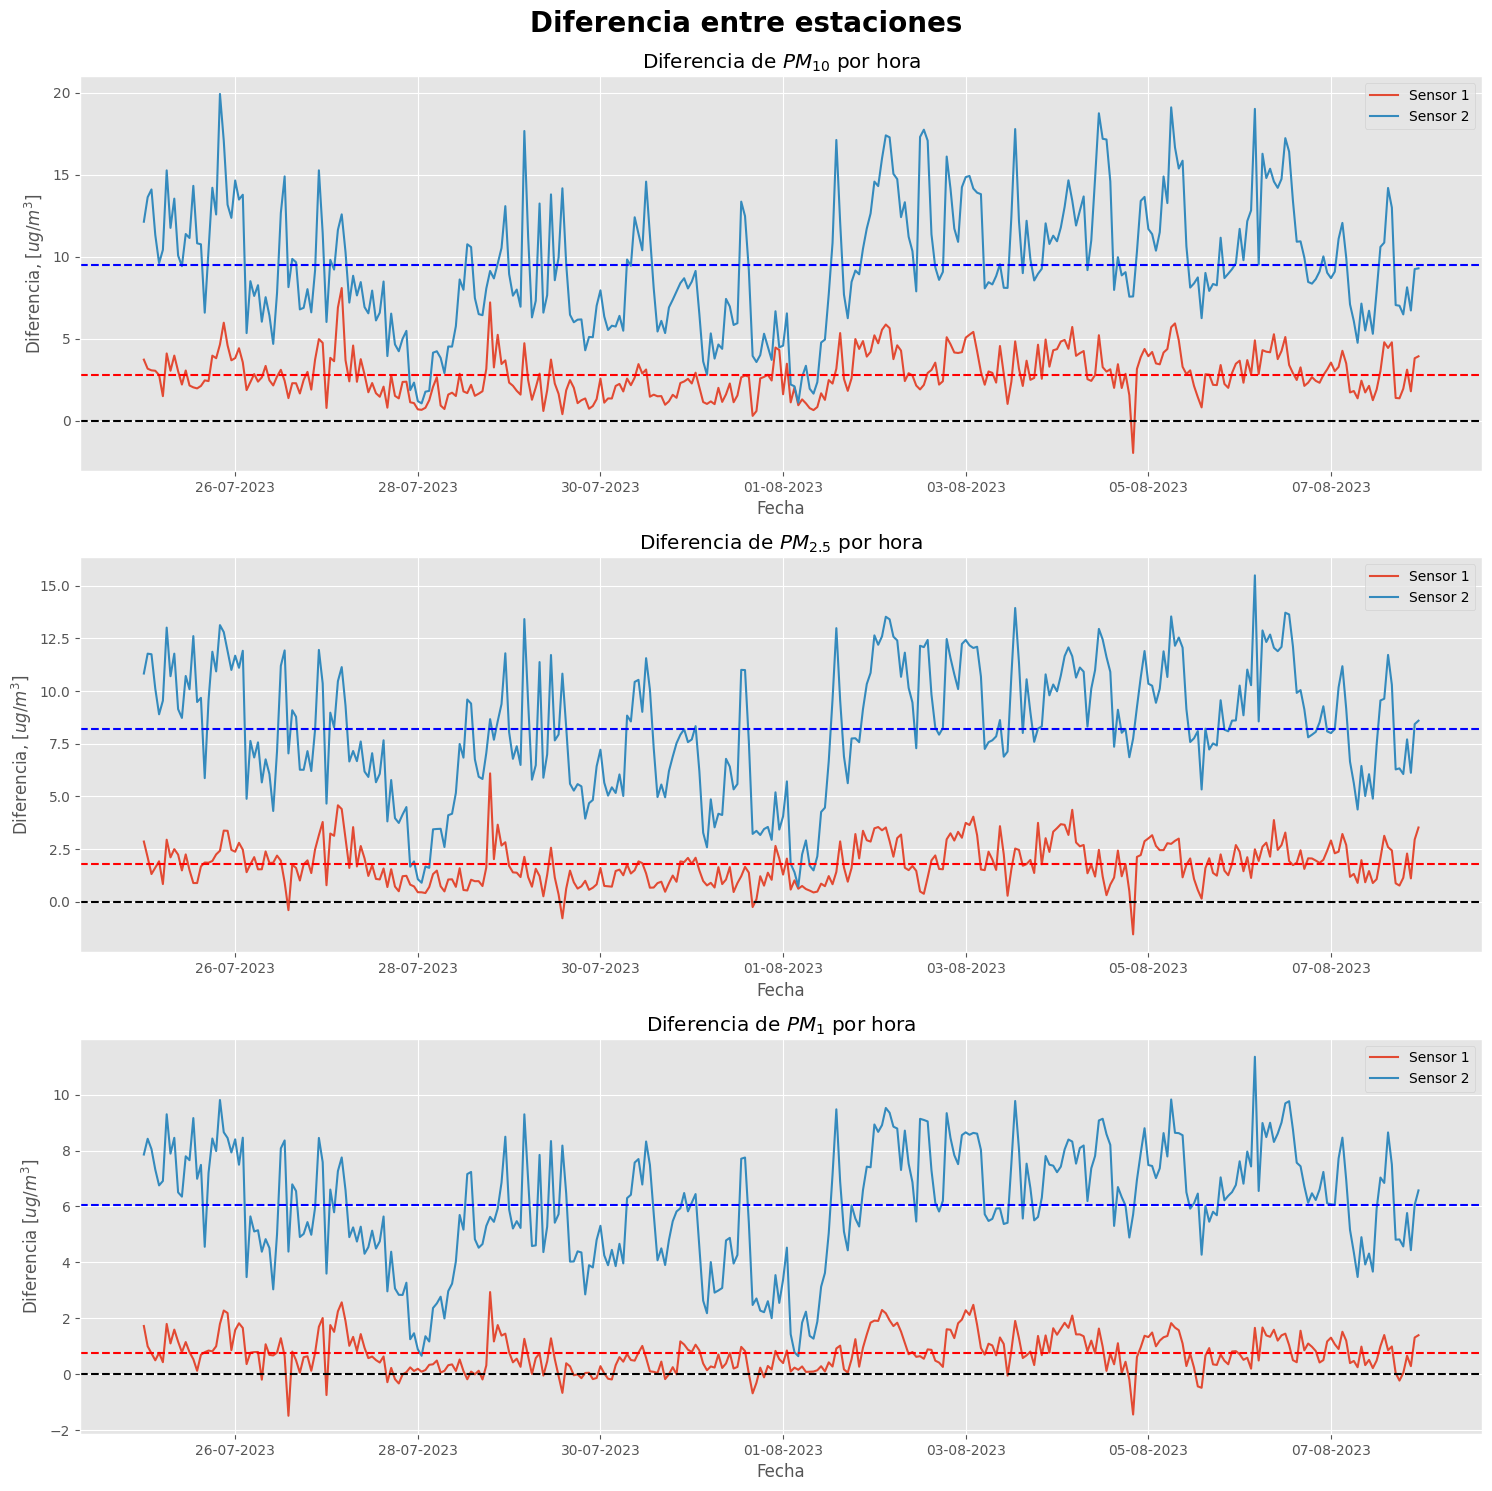

In [149]:
#Graficamos las diferencias por hora
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

ax[0].plot(df_diff_muro_h.index, df_diff_muro_h['pm10_1'], label="Sensor 1")
ax[0].plot(df_diff_muro_h.index, df_diff_muro_h['pm10_2'], label="Sensor 2")
#Línea de cero y línea del promedio
ax[0].axhline(y=0, color='black', linestyle='--')
ax[0].axhline(y=df_diff_muro_h['pm10_1'].mean(), color='red', linestyle='--')
ax[0].axhline(y=df_diff_muro_h['pm10_2'].mean(), color='blue', linestyle='--')
ax[0].set_title('Diferencia de $PM_{10}$ por hora')
ax[0].set_ylabel('Diferencia, $[ug/m^3]$')
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax[0].legend()
ax[0].set_xlabel('Fecha')

ax[1].plot(df_diff_muro_h.index, df_diff_muro_h['pm25_1'], label="Sensor 1")
ax[1].plot(df_diff_muro_h.index, df_diff_muro_h['pm25_2'], label="Sensor 2")
ax[1].axhline(y=0, color='black', linestyle='--')
ax[1].axhline(y=df_diff_muro_h['pm25_1'].mean(), color='red', linestyle='--')
ax[1].axhline(y=df_diff_muro_h['pm25_2'].mean(), color='blue', linestyle='--')
ax[1].set_title('Diferencia de $PM_{2.5}$ por hora')
ax[1].set_ylabel('Diferencia, $[ug/m^3]$')
ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax[1].legend()
ax[1].set_xlabel('Fecha')

ax[2].plot(df_diff_muro_h.index, df_diff_muro_h['pm1_1'], label='Sensor 1')
ax[2].plot(df_diff_muro_h.index, df_diff_muro_h['pm1_2'], label='Sensor 2')
ax[2].axhline(y=0, color='black', linestyle='--')
ax[2].axhline(y=df_diff_muro_h['pm1_1'].mean(), color='red', linestyle='--')
ax[2].axhline(y=df_diff_muro_h['pm1_2'].mean(), color='blue', linestyle='--')
ax[2].set_title('Diferencia de $PM_{1}$ por hora')
ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax[2].set_ylabel('Diferencia $[ug/m^3]$')
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax[2].legend()
ax[2].set_xlabel('Fecha')

fig.suptitle('Diferencia entre estaciones', fontsize=20, fontweight='bold', y=0.99)
fig.tight_layout(pad=1.0)


Para terminar de comparar, veamos qué tanto cambian las diferencias obtenidas

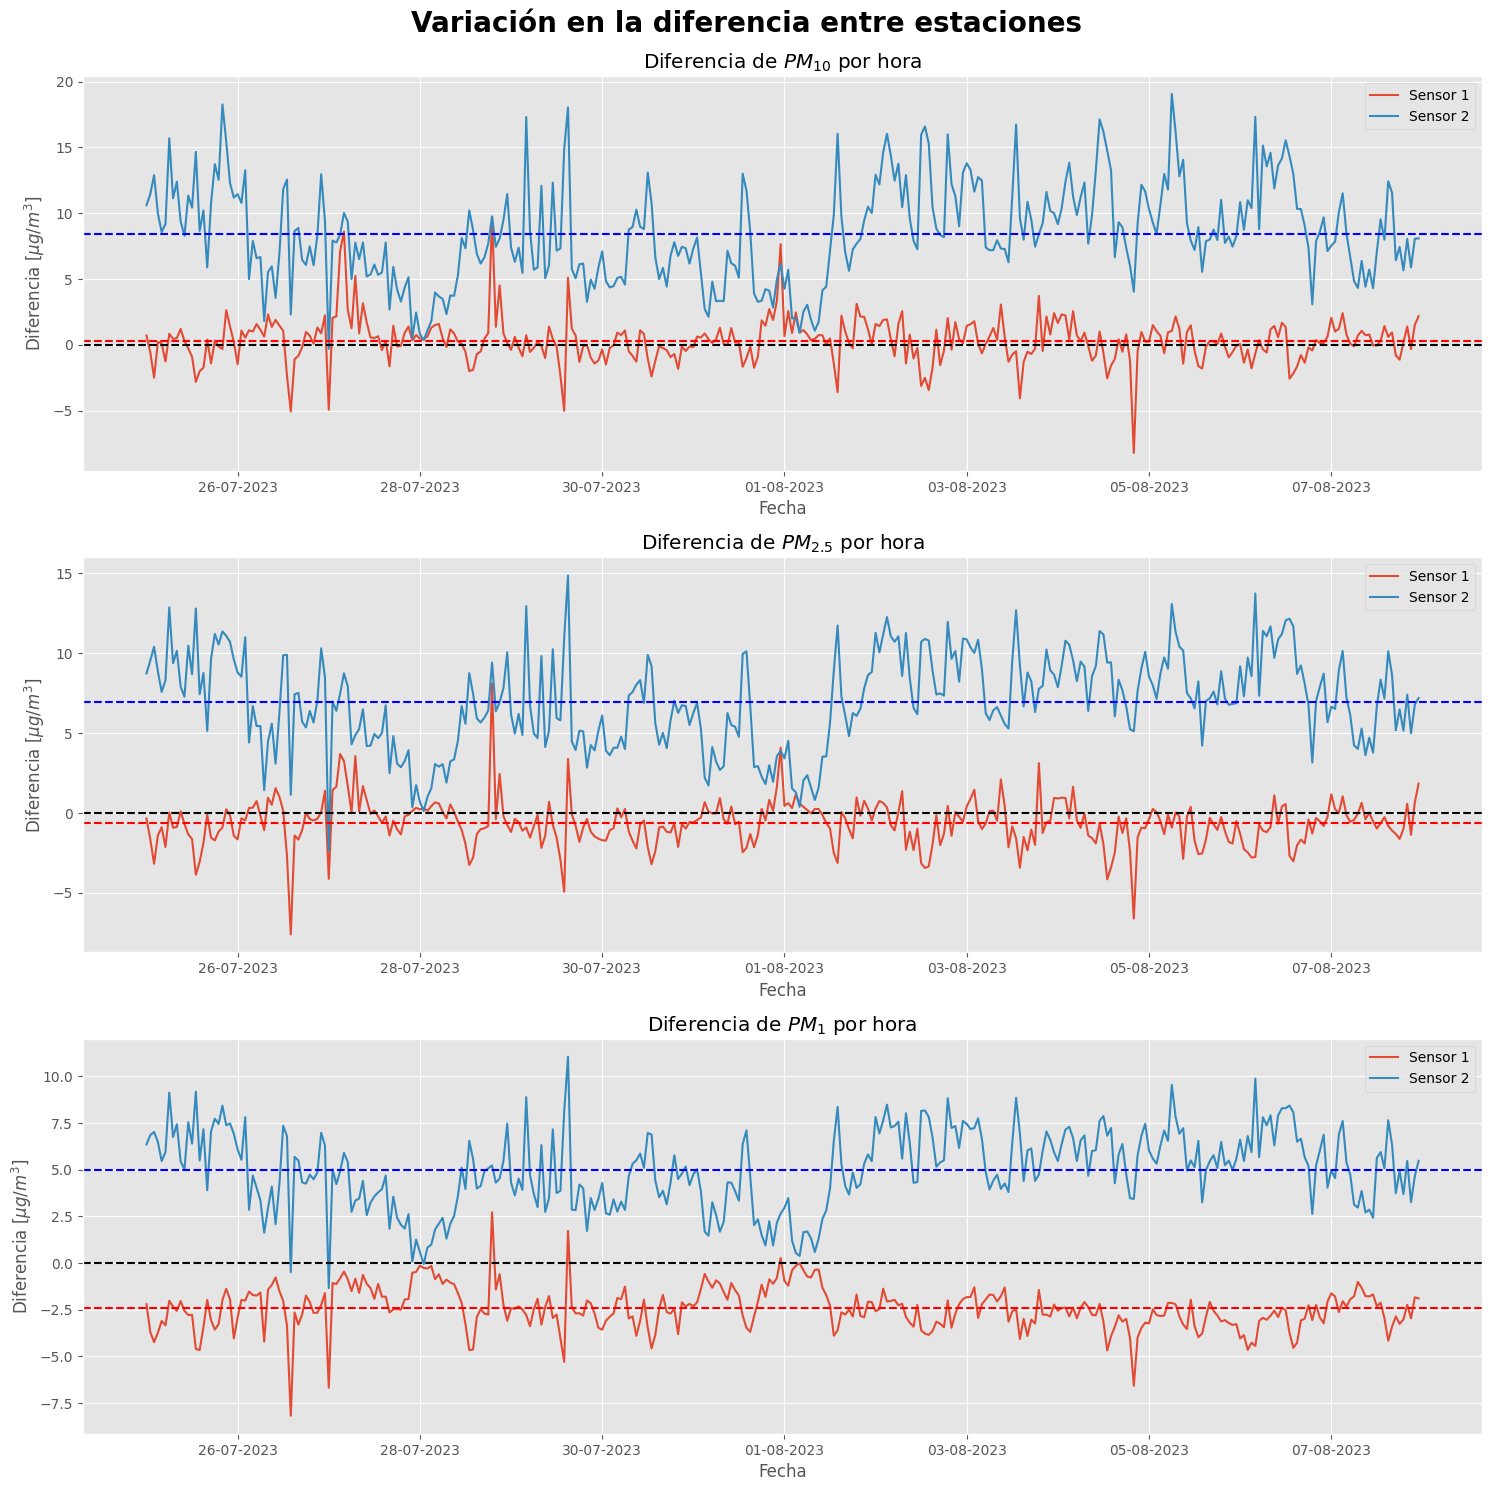

In [148]:
df_diff = df_diff_muro_h - df_diff_estaciones_h

#Graficamos las diferencias por hora
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

ax[0].plot(df_diff.index, df_diff['pm10_1'], label='Sensor 1')
ax[0].plot(df_diff.index, df_diff['pm10_2'], label='Sensor 2')
#Línea de cero y línea del promedio
ax[0].axhline(y=0, color='black', linestyle='--')
ax[0].axhline(y=df_diff['pm10_1'].mean(), color='red', linestyle='--')
ax[0].axhline(y=df_diff['pm10_2'].mean(), color='blue', linestyle='--')
ax[0].set_title('Diferencia de $PM_{10}$ por hora')
ax[0].set_ylabel('Diferencia [$\mu g/m^3$]')
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax[0].legend()
ax[0].set_xlabel('Fecha')

ax[1].plot(df_diff.index, df_diff['pm25_1'], label='Sensor 1')
ax[1].plot(df_diff.index, df_diff['pm25_2'], label='Sensor 2')
ax[1].axhline(y=0, color='black', linestyle='--')
ax[1].axhline(y=df_diff['pm25_1'].mean(), color='red', linestyle='--')
ax[1].axhline(y=df_diff['pm25_2'].mean(), color='blue', linestyle='--')
ax[1].set_title('Diferencia de $PM_{2.5}$ por hora')
ax[1].set_ylabel('Diferencia [$\mu g/m^3$]')
ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax[1].legend()
ax[1].set_xlabel('Fecha')

ax[2].plot(df_diff.index, df_diff['pm1_1'], label='Sensor 1')
ax[2].plot(df_diff.index, df_diff['pm1_2'], label='Sensor 2')
ax[2].axhline(y=0, color='black', linestyle='--')
ax[2].axhline(y=df_diff['pm1_1'].mean(), color='red', linestyle='--')
ax[2].axhline(y=df_diff['pm1_2'].mean(), color='blue', linestyle='--')
ax[2].set_title('Diferencia de $PM_{1}$ por hora')
ax[2].set_ylabel('Diferencia [$\mu g/m^3$]')
ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax[2].legend()
#Alineado a la izquierda
ax[2].set_xlabel('Fecha')

fig.suptitle('Variación en la diferencia entre estaciones', fontsize=20, fontweight='bold', y=0.99)
#Dejamos espacio entre los gráficos
fig.tight_layout(pad=1.0)


### Cambio de Altura


In [154]:
# Cargamos los nuevos datos
end_date = "2023-07-24 00:00:00"
start_date = "2023-07-15 00:00:00"


est_alta = MakeSens.download_data("E2_00022", start_date, end_date)
est_baja = MakeSens.download_data("E2_00023", start_date, end_date)

est_alta = est_alta[['pm1_1', 'pm1_2','pm10_1', 'pm10_2', 'pm25_1', 'pm25_2']]
est_baja = est_baja[['pm1_1', 'pm1_2','pm10_1', 'pm10_2', 'pm25_1', 'pm25_2']]

est_alta.index = pd.to_datetime(est_alta.index)
est_baja.index = pd.to_datetime(est_baja.index)

#Promedio por hora
est_alta_h = est_alta.resample('H').mean().copy()
est_baja_h = est_baja.resample('H').mean().copy()


Text(0.1, 0.5, 'Concentración ($\\mu g/m^3$)')

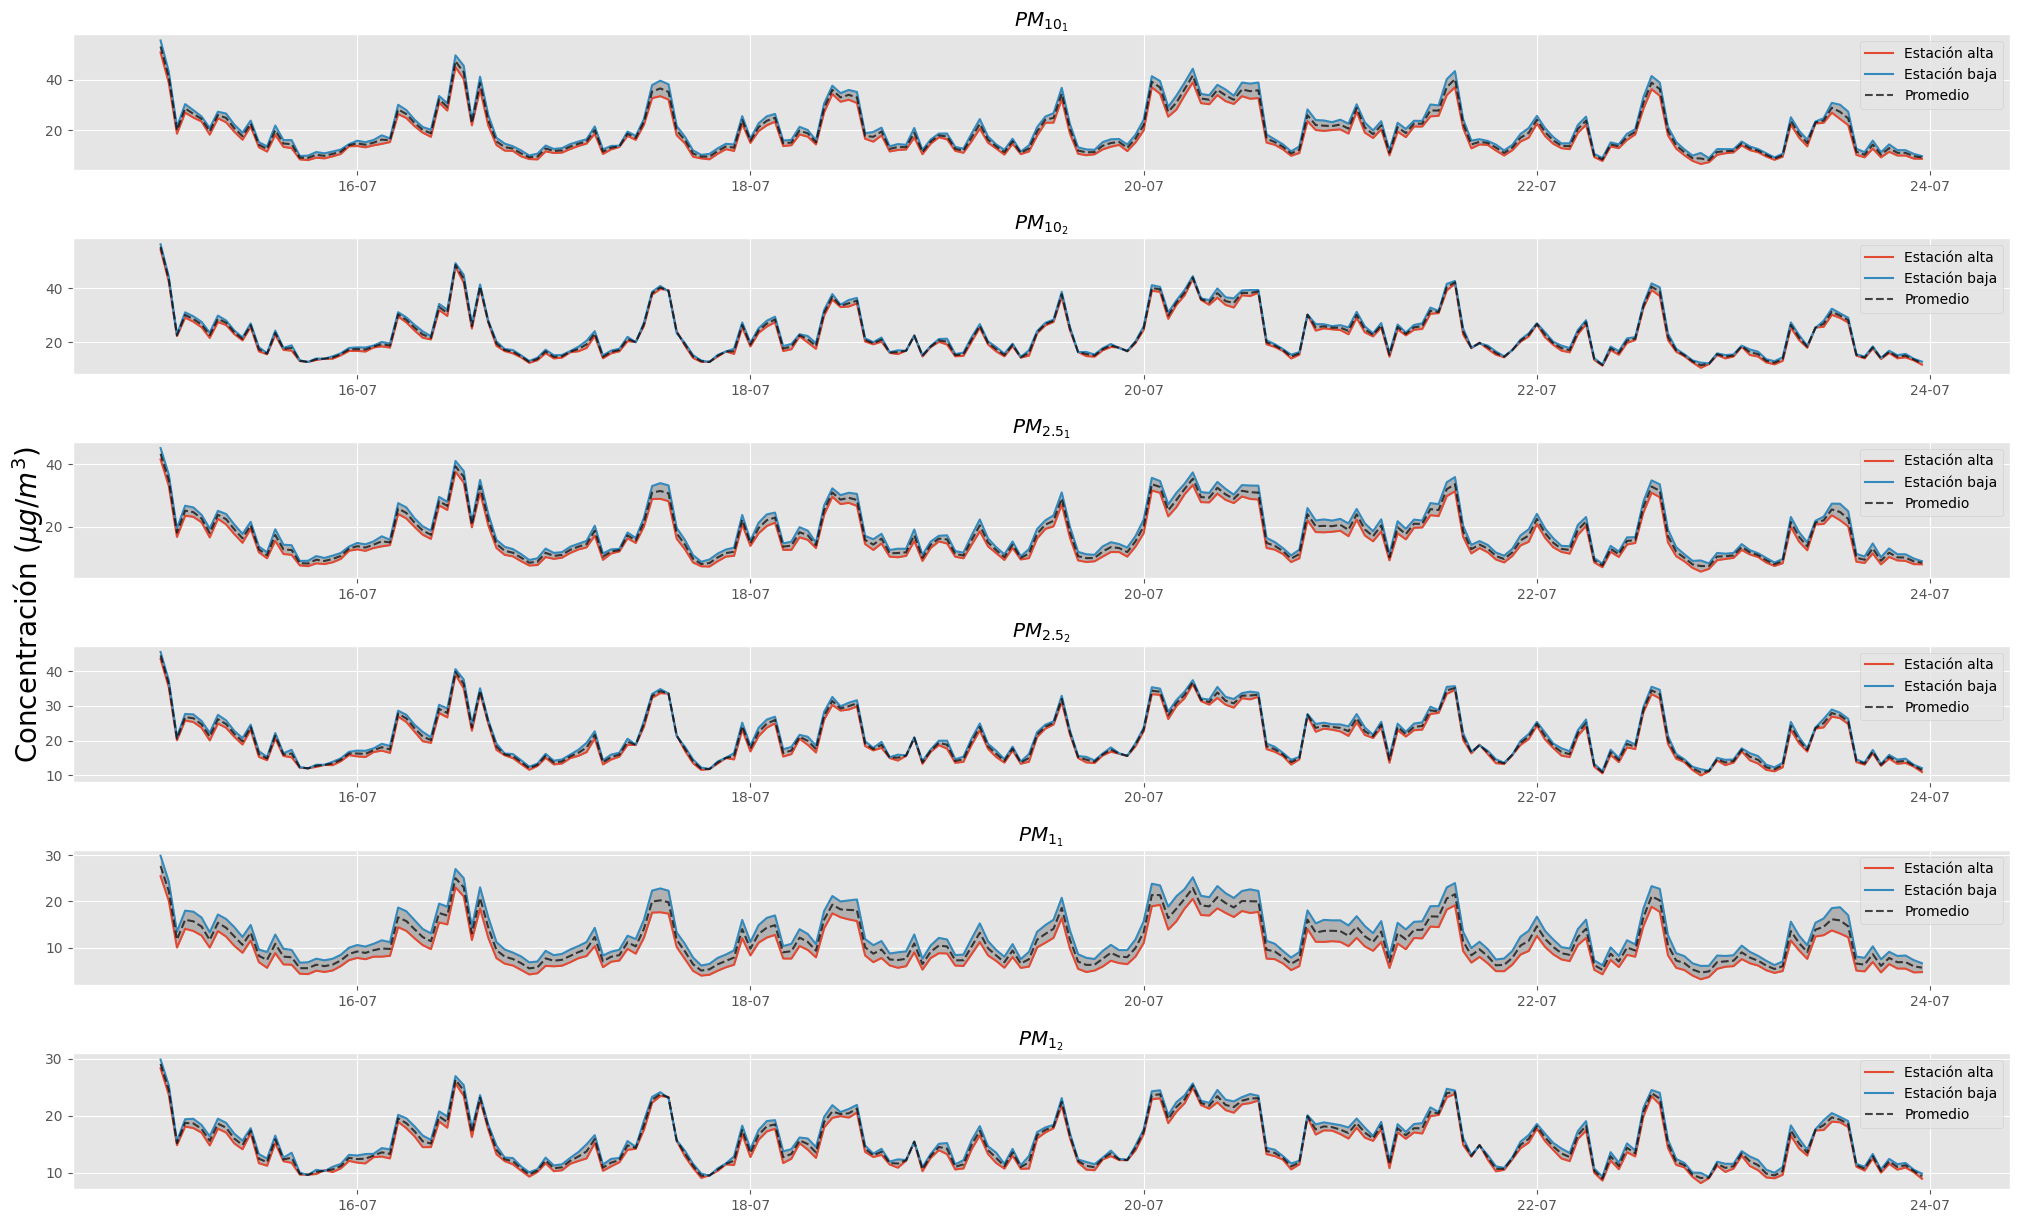

In [164]:
#Graficamos los datos
fig, axs = plt.subplots(6,1, figsize=(25,15))

axs[0].plot(est_alta_h.index, est_alta_h['pm10_1'], label='Estación alta')
axs[0].plot(est_baja_h.index, est_baja_h['pm10_1'], label='Estación baja')
axs[0].fill_between(est_alta_h.index, est_alta_h['pm10_1'], est_baja_h['pm10_1'], alpha=0.5, color = 'grey')
promedio = (est_alta_h['pm10_1'] + est_baja_h['pm10_1'])/2
axs[0].plot(est_alta_h.index, promedio, "--", label='Promedio', alpha=0.7, color='black')
axs[0].set_title('$PM_{10_1}$')
# axs[1].set_ylabel('Concentración ($\mu g/m^3$)')
axs[0].legend()
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=2))
#Espacio entre gráficas
fig.subplots_adjust(hspace=0.5)

axs[1].plot(est_alta_h.index, est_alta_h['pm10_2'], label='Estación alta')
axs[1].plot(est_baja_h.index, est_baja_h['pm10_2'], label='Estación baja')
axs[1].fill_between(est_alta_h.index, est_alta_h['pm10_2'], est_baja_h['pm10_2'], alpha=0.5, color = 'grey')
promedio = (est_alta_h['pm10_2'] + est_baja_h['pm10_2'])/2
axs[1].plot(est_alta_h.index, promedio, "--", label='Promedio', alpha=0.7, color='black')
axs[1].set_title('$PM_{10_2}$')
# axs[2].set_ylabel('Concentración ($\mu g/m^3$)')
axs[1].legend()
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=2))

axs[2].plot(est_alta_h.index, est_alta_h['pm25_1'], label='Estación alta')
axs[2].plot(est_baja_h.index, est_baja_h['pm25_1'], label='Estación baja')
axs[2].fill_between(est_alta_h.index, est_alta_h['pm25_1'], est_baja_h['pm25_1'], alpha=0.5, color = 'grey')
promedio = (est_alta_h['pm25_1'] + est_baja_h['pm25_1'])/2
axs[2].plot(est_alta_h.index, promedio, "--", label='Promedio', alpha=0.7, color='black')
axs[2].set_title('$PM_{2.5_1}$')
# ax[3].set_ylabel('Concentración ($\mu g/m^3$)')
axs[2].legend()
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
axs[2].xaxis.set_major_locator(mdates.DayLocator(interval=2))

axs[3].plot(est_alta_h.index, est_alta_h['pm25_2'], label='Estación alta')
axs[3].plot(est_baja_h.index, est_baja_h['pm25_2'], label='Estación baja')
axs[3].fill_between(est_alta_h.index, est_alta_h['pm25_2'], est_baja_h['pm25_2'], alpha=0.5, color = 'grey')
promedio = (est_alta_h['pm25_2'] + est_baja_h['pm25_2'])/2
axs[3].plot(est_alta_h.index, promedio, "--", label='Promedio', alpha=0.7, color='black')
axs[3].set_title('$PM_{2.5_2}$')
# axs[4].set_ylabel('Concentración ($\mu g/m^3$)')
axs[3].legend()
axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
axs[3].xaxis.set_major_locator(mdates.DayLocator(interval=2))

axs[4].plot(est_alta_h.index, est_alta_h['pm1_1'], label='Estación alta')
axs[4].plot(est_baja_h.index, est_baja_h['pm1_1'], label='Estación baja')
axs[4].fill_between(est_alta_h.index, est_alta_h['pm1_1'], est_baja_h['pm1_1'], alpha=0.5, color = 'grey')
promedio = (est_alta_h['pm1_1'] + est_baja_h['pm1_1'])/2
axs[4].plot(est_alta_h.index, promedio, "--", label='Promedio', alpha=0.7, color='black')
axs[4].set_title('$PM_{1_1}$')
# axs[5].set_ylabel('Concentración ($\mu g/m^3$)')
axs[4].legend()
axs[4].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
axs[4].xaxis.set_major_locator(mdates.DayLocator(interval=2))

axs[5].plot(est_alta_h.index, est_alta_h['pm1_2'], label='Estación alta')
axs[5].plot(est_baja_h.index, est_baja_h['pm1_2'], label='Estación baja')
axs[5].fill_between(est_alta_h.index, est_alta_h['pm1_2'], est_baja_h['pm1_2'], alpha=0.5, color = 'grey')
promedio = (est_alta_h['pm1_2'] + est_baja_h['pm1_2'])/2
axs[5].plot(est_alta_h.index, promedio, "--", label='Promedio', alpha=0.7, color='black')
axs[5].set_title('$PM_{1_2}$')
# ax5s[6].set_ylabel('Concentración ($\mu g/m^3$)')
axs[5].legend()
axs[5].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
axs[5].xaxis.set_major_locator(mdates.DayLocator(interval=2))

fig.supylabel('Concentración ($\mu g/m^3$)', fontsize=20, x=0.1, y=0.5)

In [162]:
#Calculamos la diferencia entre sensores
df_diff_alt =  est_baja - est_alta
df_diff_alt_h =  est_baja_h - est_alta_h

df_mean_alt = df_diff_alt.mean()
df_std_alt = df_diff_alt.std()
df_std_alt_h = df_diff_alt_h.std()

df_alt_rms = np.sqrt((df_diff_alt**2).mean())
df_alt_rms_h = np.sqrt((df_diff_alt_h**2).mean())

df_alturas = pd.DataFrame({'Diferencia Promedio':df_mean_alt, 'Desviación Estándar':df_std_alt, 'Desviación Estándar (H)':df_std_alt_h, 'Media Cuadrática':df_alt_rms, 'Media Cuadrática (H)':df_alt_rms_h})
df_alturas



Diferencia Promedio  Desviación Estándar  Desviación Estándar (H)  \
pm1_1              3.421256             1.653855                 0.816845   
pm1_2              1.143846             3.033076                 0.529592   
pm10_1             2.854387             3.798896                 1.226329   
pm10_2             1.306531             4.348054                 0.748385   
pm25_1             2.751493             2.938425                 0.887105   
pm25_2             1.410153             3.672917                 0.678735   

        Media Cuadrática  Media Cuadrática (H)  
pm1_1           3.800001              3.520165  
pm1_2           3.241482              1.263127  
pm10_1          4.751630              3.121296  
pm10_2          4.539944              1.502966  
pm25_1          4.025466              2.900704  
pm25_2          3.934181              1.564033

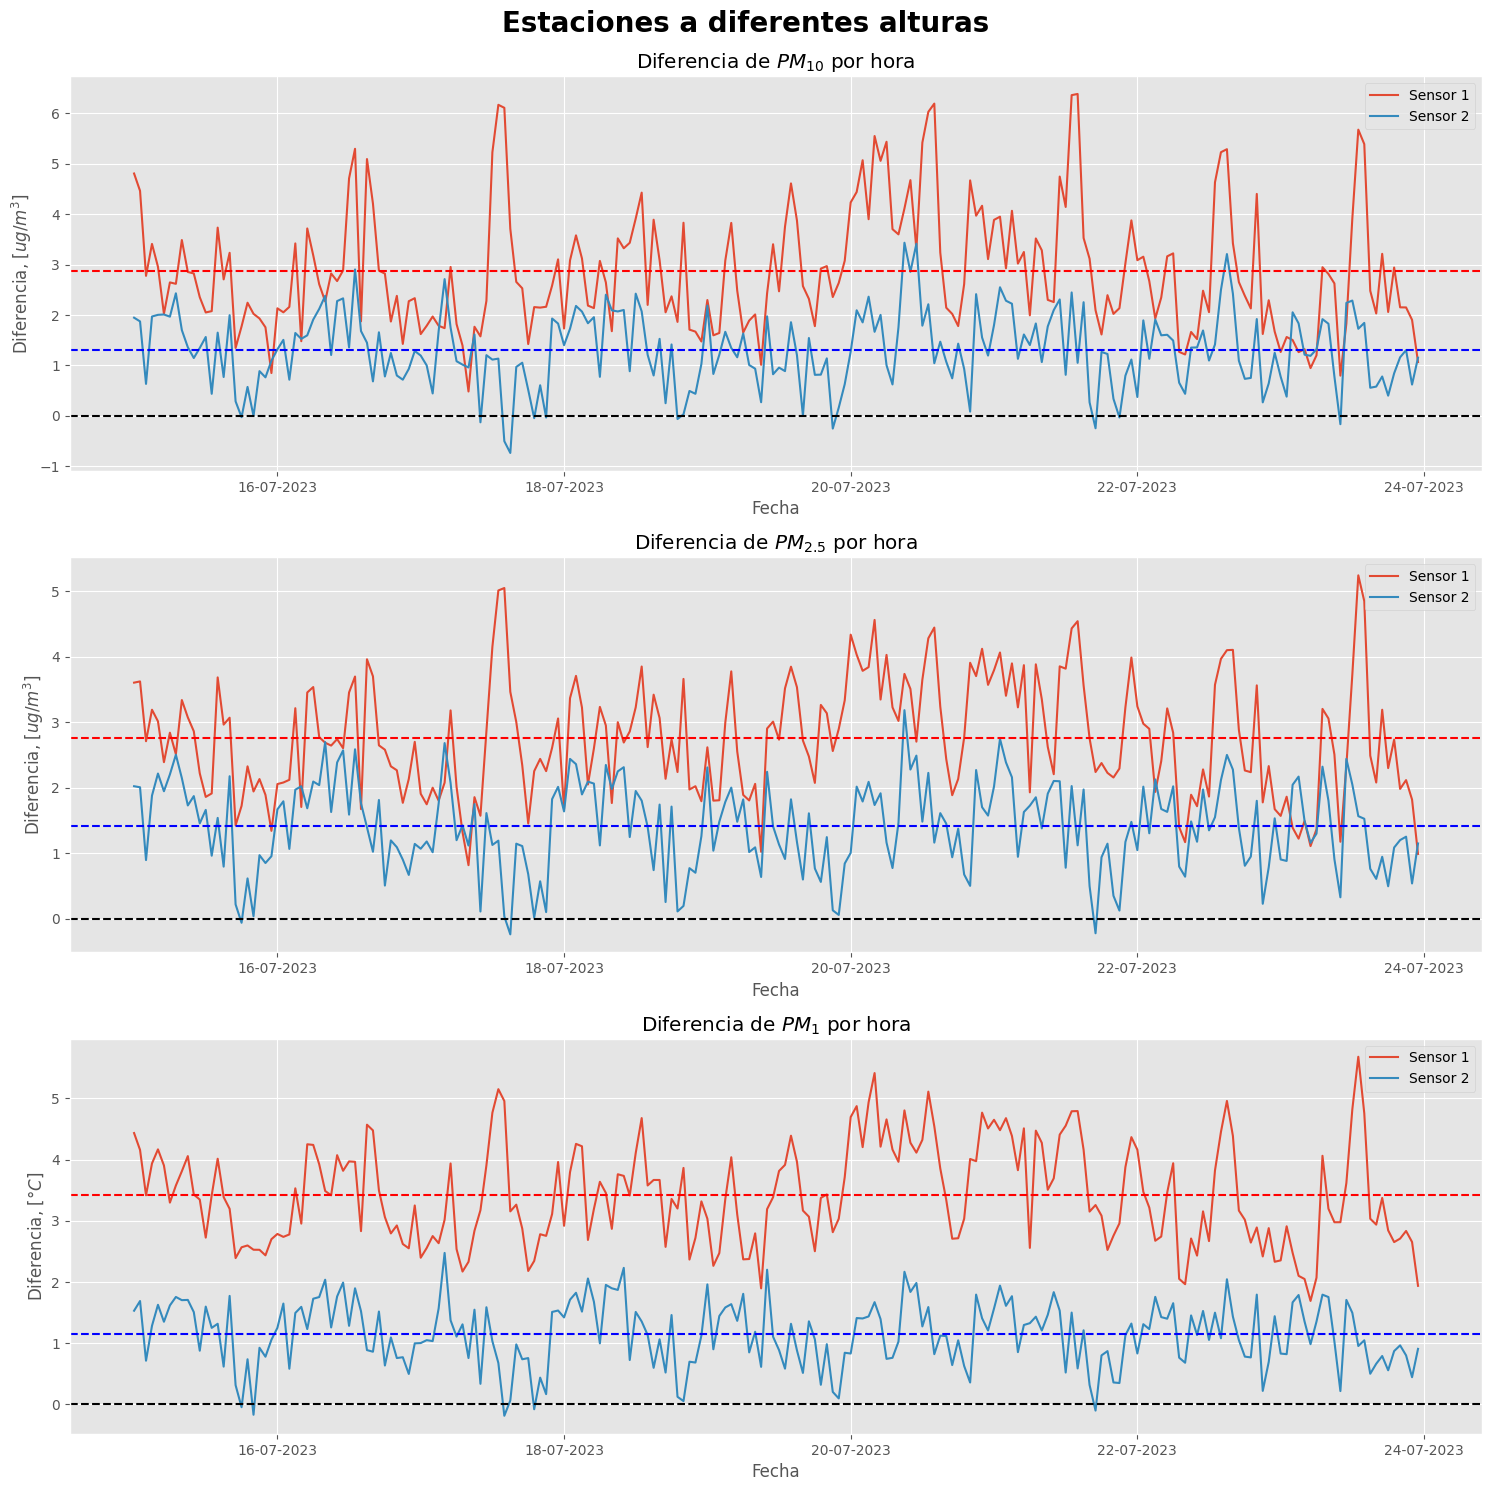

In [163]:
#Graficamos las diferencias por hora

fig, ax = plt.subplots(3, 1, figsize=(15, 15))

ax[0].plot(df_diff_alt_h.index, df_diff_alt_h['pm10_1'], label="Sensor 1")
ax[0].plot(df_diff_alt_h.index, df_diff_alt_h['pm10_2'], label="Sensor 2")
ax[0].axhline(y=0, color='black', linestyle='--')
ax[0].axhline(y=df_diff_alt_h['pm10_1'].mean(), color='red', linestyle='--')
ax[0].axhline(y=df_diff_alt_h['pm10_2'].mean(), color='blue', linestyle='--')
ax[0].set_title('Diferencia de $PM_{10}$ por hora')
ax[0].set_ylabel('Diferencia, $[ug/m^3]$')
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax[0].legend()
ax[0].set_xlabel('Fecha')

ax[1].plot(df_diff_alt_h.index, df_diff_alt_h['pm25_1'], label="Sensor 1")
ax[1].plot(df_diff_alt_h.index, df_diff_alt_h['pm25_2'], label="Sensor 2")
ax[1].axhline(y=0, color='black', linestyle='--')
ax[1].axhline(y=df_diff_alt_h['pm25_1'].mean(), color='red', linestyle='--')
ax[1].axhline(y=df_diff_alt_h['pm25_2'].mean(), color='blue', linestyle='--')
ax[1].set_title('Diferencia de $PM_{2.5}$ por hora')
ax[1].set_ylabel('Diferencia, $[ug/m^3]$')
ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax[1].legend()
ax[1].set_xlabel('Fecha')

ax[2].plot(df_diff_alt_h.index, df_diff_alt_h['pm1_1'], label="Sensor 1")
ax[2].plot(df_diff_alt_h.index, df_diff_alt_h['pm1_2'], label="Sensor 2")
ax[2].axhline(y=0, color='black', linestyle='--')
ax[2].axhline(y=df_diff_alt_h['pm1_1'].mean(), color='red', linestyle='--')
ax[2].axhline(y=df_diff_alt_h['pm1_2'].mean(), color='blue', linestyle='--')
ax[2].set_title('Diferencia de $PM_{1}$ por hora')
ax[2].set_ylabel('Diferencia, $[°C]$')
ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax[2].legend()
ax[2].set_xlabel('Fecha')

fig.suptitle('Estaciones a diferentes alturas', fontsize=20, fontweight='bold', y=0.99)
fig.tight_layout(pad=1.0)



pm1_1     pm1_2    pm10_1    pm10_2    pm25_1  \
2023-07-15 00:00:00  4.433333  1.530000  4.806667  1.946667  3.603333   
2023-07-15 01:00:00  4.157571  1.688475  4.462542  1.872768  3.622034   
2023-07-15 02:00:00  3.416667  0.713333  2.776667  0.633333  2.710000   
2023-07-15 03:00:00  3.936667  1.283333  3.410000  1.970000  3.190000   
2023-07-15 04:00:00  4.166667  1.626667  2.956667  2.003334  3.013333   

                       pm25_2  
2023-07-15 00:00:00  2.023333  
2023-07-15 01:00:00  2.007175  
2023-07-15 02:00:00  0.896667  
2023-07-15 03:00:00  1.880000  
2023-07-15 04:00:00  2.216667

In [181]:
df_diff_alt_h

pm1_1     pm1_2    pm10_1    pm10_2    pm25_1  \
2023-07-15 00:00:00  4.433333  1.530000  4.806667  1.946667  3.603333   
2023-07-15 01:00:00  4.157571  1.688475  4.462542  1.872768  3.622034   
2023-07-15 02:00:00  3.416667  0.713333  2.776667  0.633333  2.710000   
2023-07-15 03:00:00  3.936667  1.283333  3.410000  1.970000  3.190000   
2023-07-15 04:00:00  4.166667  1.626667  2.956667  2.003334  3.013333   
...                       ...       ...       ...       ...       ...   
2023-07-23 19:00:00  2.651638  0.870791  2.941695  0.842881  2.734859   
2023-07-23 20:00:00  2.708475  0.964068  2.152034  1.160678  1.982260   
2023-07-23 21:00:00  2.833333  0.800000  2.150000  1.303333  2.116667   
2023-07-23 22:00:00  2.653333  0.443333  1.903333  0.620000  1.820000   
2023-07-23 23:00:00  1.936667  0.906667  1.066667  1.153333  0.990000   

                       pm25_2  
2023-07-15 00:00:00  2.023333  
2023-07-15 01:00:00  2.007175  
2023-07-15 02:00:00  0.896667  
2023-07-15 03:00:00  1.880000  
2023-07-15 04:00:00  2.216667  
...                       ...  
2023-07-23 19:00:00  1.088022  
2023-07-23 20:00:00  1.201582  
2023-07-23 21:00:00  1.253333  
2023-07-23 22:00:00  0.540000  
2023-07-23 23:00:00  1.150000  

[216 rows x 6 columns]

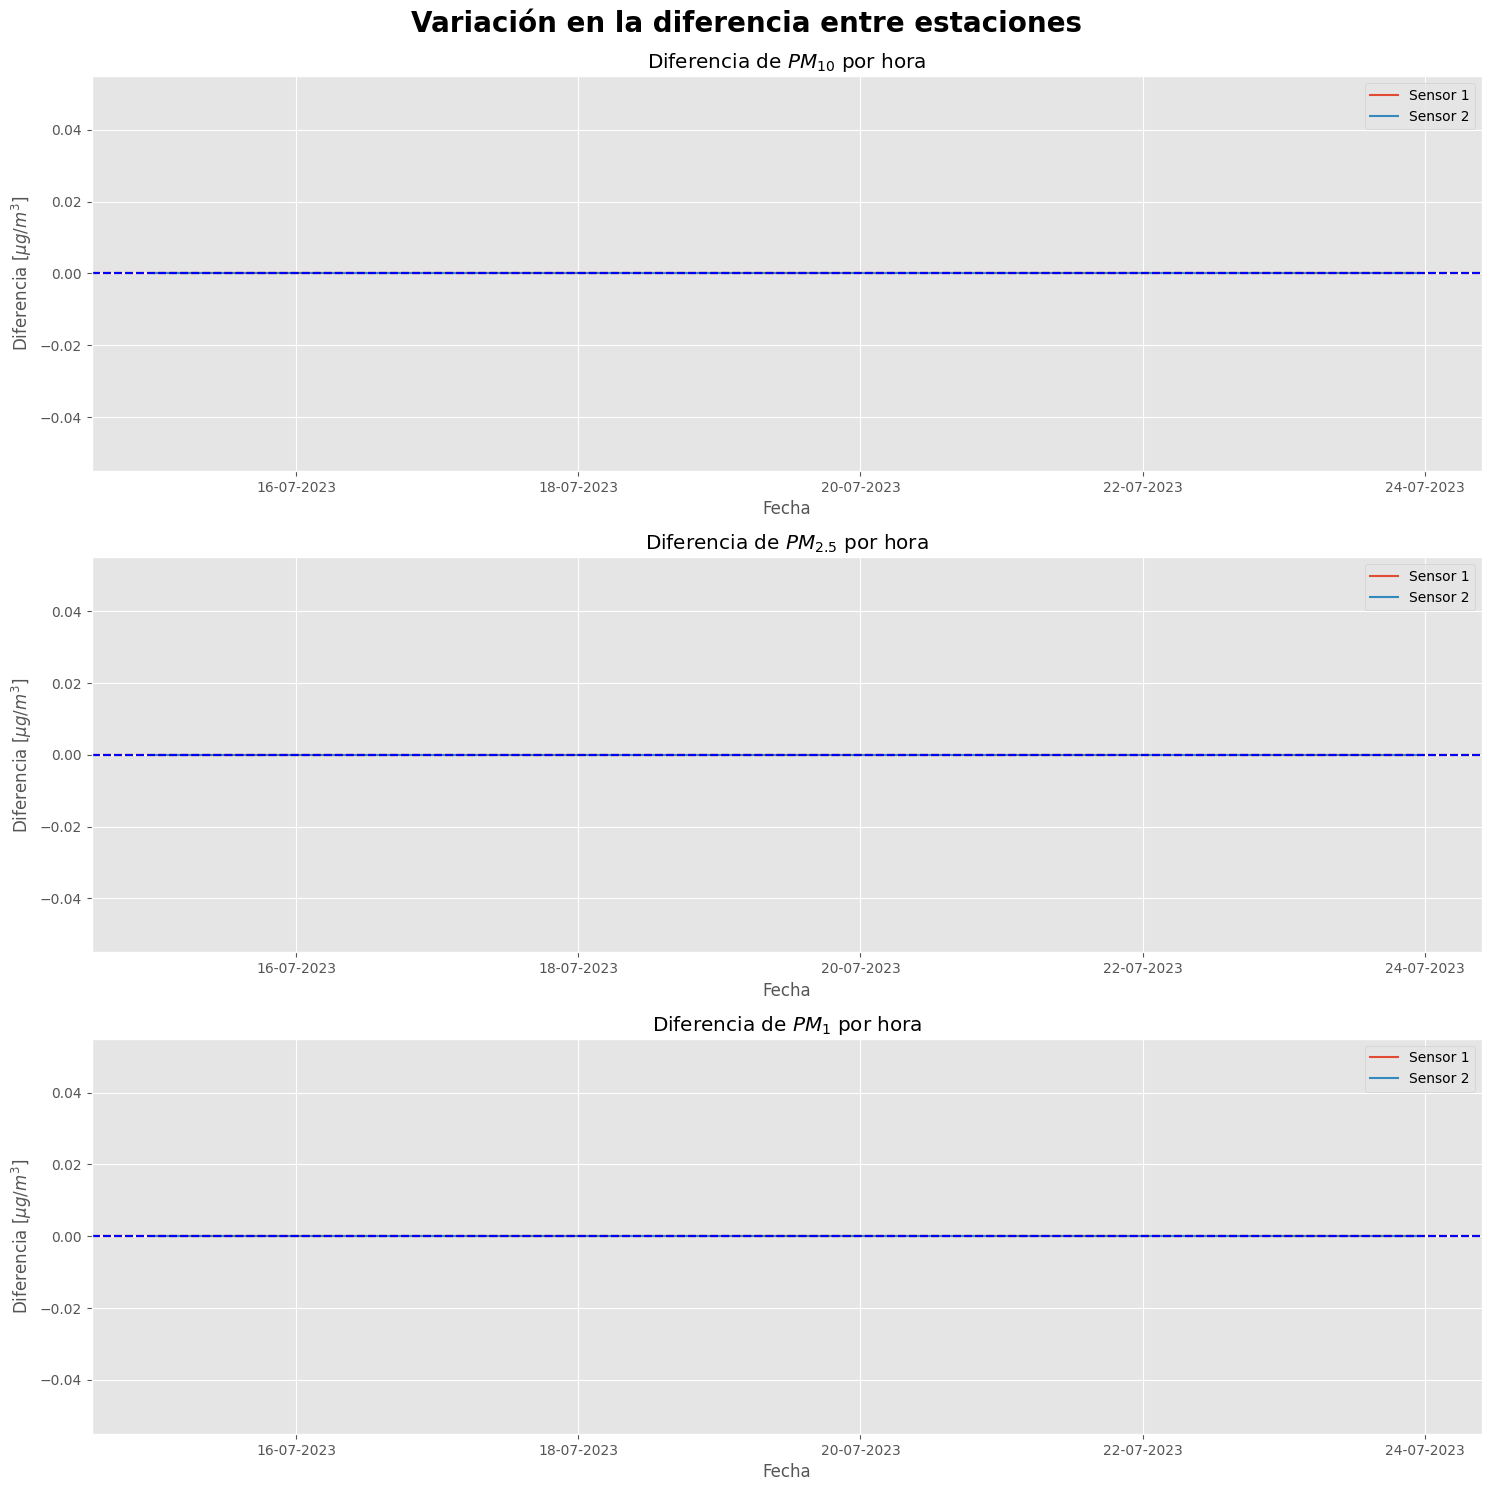

In [177]:
df_diff = df_diff_alt_h - df_diff_est_h


#Graficamos las diferencias por hora
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

ax[0].plot(df_diff.index, df_diff['pm10_1'], label='Sensor 1')
ax[0].plot(df_diff.index, df_diff['pm10_2'], label='Sensor 2')
#Línea de cero y línea del promedio
ax[0].axhline(y=0, color='black', linestyle='--')
ax[0].axhline(y=df_diff['pm10_1'].mean(), color='red', linestyle='--')
ax[0].axhline(y=df_diff['pm10_2'].mean(), color='blue', linestyle='--')
ax[0].set_title('Diferencia de $PM_{10}$ por hora')
ax[0].set_ylabel('Diferencia [$\mu g/m^3$]')
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax[0].legend()
ax[0].set_xlabel('Fecha')

ax[1].plot(df_diff.index, df_diff['pm25_1'], label='Sensor 1')
ax[1].plot(df_diff.index, df_diff['pm25_2'], label='Sensor 2')
ax[1].axhline(y=0, color='black', linestyle='--')
ax[1].axhline(y=df_diff['pm25_1'].mean(), color='red', linestyle='--')
ax[1].axhline(y=df_diff['pm25_2'].mean(), color='blue', linestyle='--')
ax[1].set_title('Diferencia de $PM_{2.5}$ por hora')
ax[1].set_ylabel('Diferencia [$\mu g/m^3$]')
ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax[1].legend()
ax[1].set_xlabel('Fecha')

ax[2].plot(df_diff.index, df_diff['pm1_1'], label='Sensor 1')
ax[2].plot(df_diff.index, df_diff['pm1_2'], label='Sensor 2')
ax[2].axhline(y=0, color='black', linestyle='--')
ax[2].axhline(y=df_diff['pm1_1'].mean(), color='red', linestyle='--')
ax[2].axhline(y=df_diff['pm1_2'].mean(), color='blue', linestyle='--')
ax[2].set_title('Diferencia de $PM_{1}$ por hora')
ax[2].set_ylabel('Diferencia [$\mu g/m^3$]')
ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax[2].legend()
#Alineado a la izquierda
ax[2].set_xlabel('Fecha')

fig.suptitle('Variación en la diferencia entre estaciones', fontsize=20, fontweight='bold', y=0.99)
#Dejamos espacio entre los gráficos
fig.tight_layout(pad=1.0)


In [180]:
df_diff_alt_h #df_diff_est_h

pm1_1     pm1_2    pm10_1    pm10_2    pm25_1  \
2023-07-15 00:00:00  4.433333  1.530000  4.806667  1.946667  3.603333   
2023-07-15 01:00:00  4.157571  1.688475  4.462542  1.872768  3.622034   
2023-07-15 02:00:00  3.416667  0.713333  2.776667  0.633333  2.710000   
2023-07-15 03:00:00  3.936667  1.283333  3.410000  1.970000  3.190000   
2023-07-15 04:00:00  4.166667  1.626667  2.956667  2.003334  3.013333   
...                       ...       ...       ...       ...       ...   
2023-07-23 19:00:00  2.651638  0.870791  2.941695  0.842881  2.734859   
2023-07-23 20:00:00  2.708475  0.964068  2.152034  1.160678  1.982260   
2023-07-23 21:00:00  2.833333  0.800000  2.150000  1.303333  2.116667   
2023-07-23 22:00:00  2.653333  0.443333  1.903333  0.620000  1.820000   
2023-07-23 23:00:00  1.936667  0.906667  1.066667  1.153333  0.990000   

                       pm25_2  
2023-07-15 00:00:00  2.023333  
2023-07-15 01:00:00  2.007175  
2023-07-15 02:00:00  0.896667  
2023-07-15 03:00:00  1.880000  
2023-07-15 04:00:00  2.216667  
...                       ...  
2023-07-23 19:00:00  1.088022  
2023-07-23 20:00:00  1.201582  
2023-07-23 21:00:00  1.253333  
2023-07-23 22:00:00  0.540000  
2023-07-23 23:00:00  1.150000  

[216 rows x 6 columns]